# СБОРНЫЙ ПРОЕКТ
## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»
### Цель исследования
**Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании**
### Ход исследования
- Изучение данных
- Подготовка данных
- Исследовательский анализ данных
- Портрет пользователя по регионам
- Проверка гипотез
- Общий вывод

In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from datetime import datetime

%matplotlib inline
# задаем размер окна графика
plt.rcParams['figure.figsize'] = 30, 15
# задаем эстетические параметры визуализации графиков
sns.set(context='talk', style='darkgrid', palette='muted', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

## Изучение данных
### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


In [4]:
# создаем датафрейм из данных таблицы
df = pd.read_csv(r'./datasets/games.csv')
#df = pd.read_csv('/datasets/games.csv')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных
### Форматирование названий признаков

In [5]:
# переводим названия столбцов в нижний регистр
df.columns = map(str.lower, df.columns)
# проверяем изменения
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [6]:
# проверим дупликаты
df.duplicated().sum()

0

### Обработка пропущенных значений
#### Поиск пропущенных значений

In [7]:
# подсчёт количества пропущенных значений по каждому полю (столбцу)
print('Количество пропусков:', df.isna().sum(), sep='\n')

Количество пропусков:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### Поле `name`

In [8]:
# посмотрим строки с пропусками в поле `name`
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# удалим строки с пропусками в поле `name`
df = df.loc[df['name'].isna() == False]

#### Поле `year_of_release`

In [10]:
# пропуски в значениях года заменим на нуль
df['year_of_release'] = df['year_of_release'].fillna(0)

#### Поле `critic_score`

In [11]:
# поскольку в минимальных значениях оценок критиков нет нулевых значений, можно пропуски заменить на нуль
# нулевое значение означает отсутствие оценки критика
df['critic_score'] = df['critic_score'].fillna(0)

#### Поле `user_score`

In [12]:
# выведим уникальные значения и их количество
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Помимо пропусков поле `user_score` содержит значение `tdb`, что в игровой индустрии означает To Be Determined - "будет определено".
Нулевых оценок у нас всего одна, она не информативная.
Предлагаю значения `tdb` и пропуски обнулить.
Нулевое значение означает отсутствие оценки пользователя.

In [13]:
df['user_score'] = df['user_score'].fillna(0)
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0

#### Поле `rating`

In [14]:
# выведим уникальные значения
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

- **«EC»** («Early childhood») — *«Для детей младшего возраста»*
- **«E»** («Everyone») — *«Для всех»* (**К-А** устаревшее обозначение)
- **«E10+»** («Everyone 10 and older») — *«Для всех от 10 лет и старше»*
- **«T»** («Teen») — *«Подросткам» 13+*
- **«M»** («Mature») — *«Для взрослых» 17+*
- **«AO»** («Adults Only 18+») — *«Только для взрослых» 18+*
- **«RP»** («Rating Pending») — *«Рейтинг ожидается»*

Исходя из этого, предлагаю категорию К-А перевести в категорию Е.
Пропуски заполнить значениями категории RP

In [15]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df['rating'] = df['rating'].fillna('unknown')
# проверим внесенные изменения
df['rating'].value_counts()

unknown    6764
E          3993
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: rating, dtype: int64

In [16]:
print('Количество пропусков:', df.isna().sum(), sep='\n')

Количество пропусков:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Преобразование типов данных
- поле `year_of_release` содержит дату года, поэтому переведем значения из `float(64)` в `int(64)`
- поля `critic_score`, `user_score` согласно описанию имеют значения по целочисленной шкале: 1...100 и 1...10 соотвественно. Переведем из `object` в `float(64)`, выполним округление и в `int(64)`

In [17]:
df['year_of_release'] = round(df['year_of_release']).astype('int64')
df['user_score'] = round(df['user_score'].astype('float64')).astype('int64')
df['critic_score'] = round(df['critic_score']).astype('int64')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB
None


### Дополнительные расчеты

In [18]:
# создадим вычисляемый столбец по общим продажам
df.insert(8, 'total_sales', df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])
# выполним категоризацию критических отзывов
# оценка критика: отлично/хорошо/норма/плохо
def score_category(seq):

    if seq.loc['critic_score'] < 70:
        return 'плохо'
    elif seq.loc['critic_score'] >= 70 and seq.loc['critic_score'] < 80:
        return 'норма'
    elif seq.loc['critic_score'] >= 80 and seq.loc['critic_score'] < 90:
        return 'хорошо'
    else:
        return 'отлично'

# создаем столбец в датафрейме df3 с категориями оценок критиков.
df['critic_score_category'] = df.apply(score_category, axis=1)
# приведем к категориальному типу
df['critic_score_category'] = df['critic_score_category'].astype('category')
display(df.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,critic_score_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8,E,норма
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0,0,unknown,плохо
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8,E,хорошо


### Вывод
На этапе преобработки данных:
- обработаны пропуски;
- обработаны артефакты значений;
- названия признаков приведены к единому стандарту;
- выполнено приведение к оптимальным типам данных;
- введены дополинтельные категориальные данные для дальнейшего анализа;
- дупликаты не обнаружены.

## Исследовательский анализ данных
### Шаг 1
**Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

<AxesSubplot:title={'center':'Количество выпущенных компьютерных игр'}, xlabel='year_of_release', ylabel='number_games'>

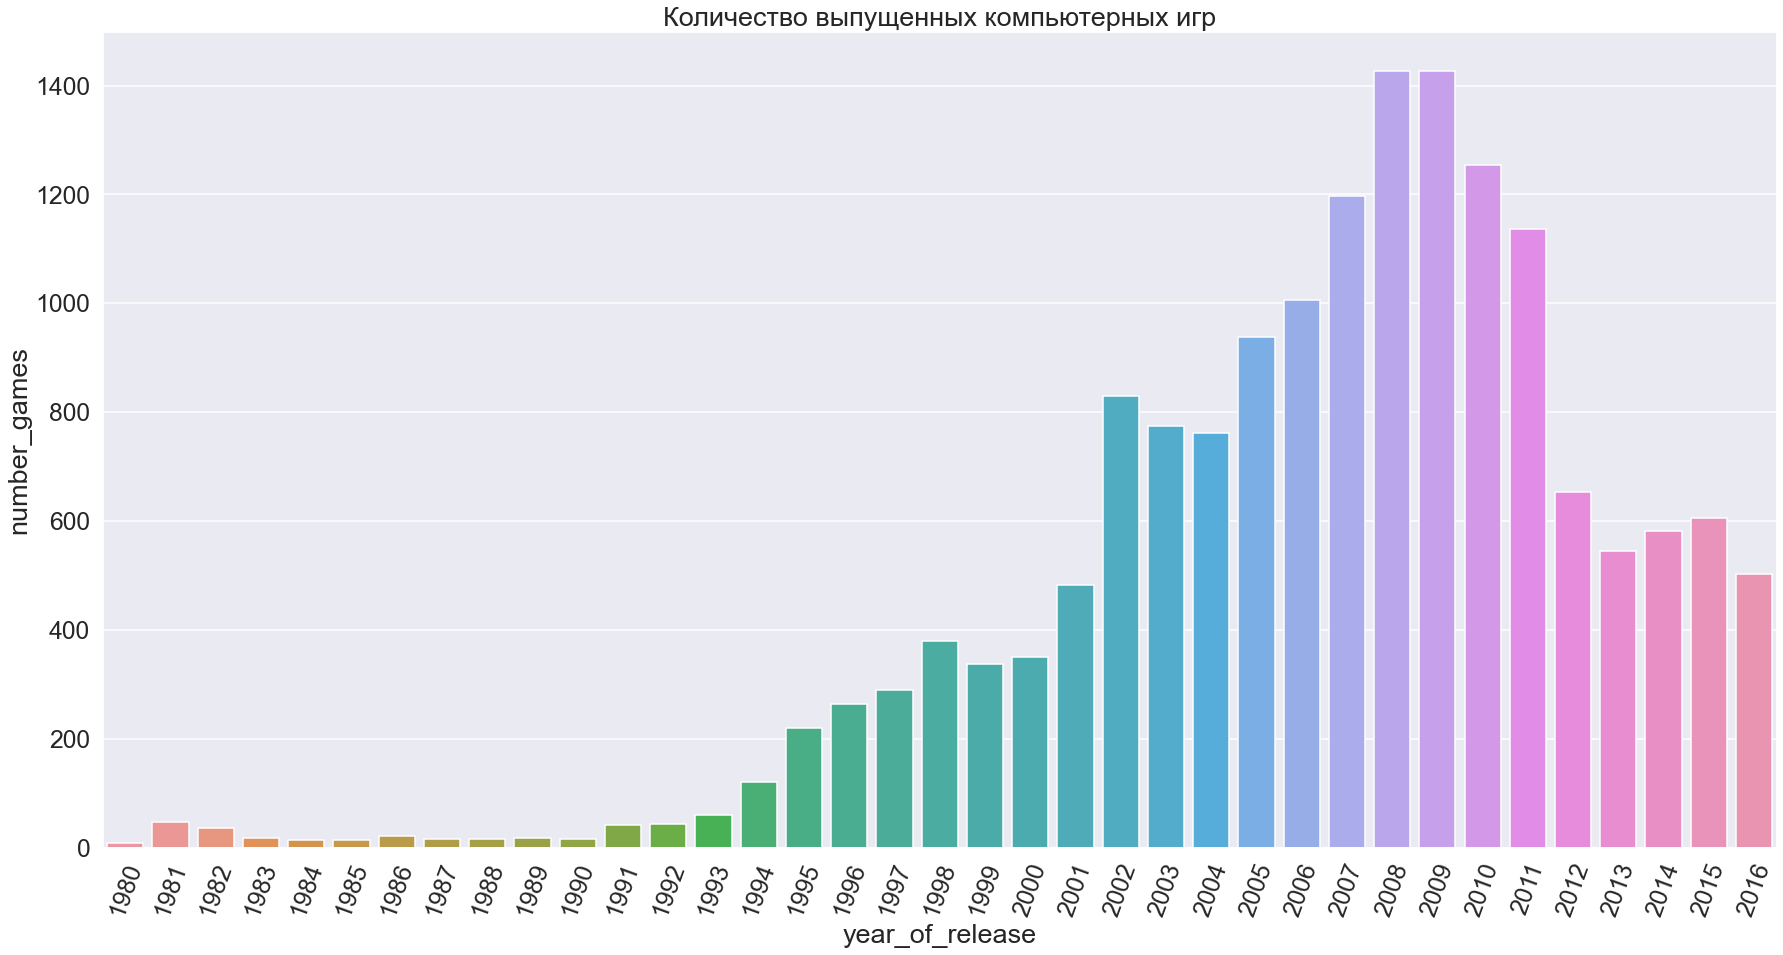

In [19]:
# формируем датафрейм через группировку по годам и агрегацией через функцию count()
number_games = df.groupby('year_of_release')['name'].count().reset_index().rename(columns={'name': 'number_games'})
# делаем срез без нулевых значений
number_games = number_games.query('year_of_release > 0')
# выводим столбчатый график
plt.title('Количество выпущенных компьютерных игр')
plt.xticks(rotation=70)
sns.barplot(x=number_games['year_of_release'], y=number_games['number_games'])

Для последующего анализа целесообразно брать данные за период с 1990 по 2016 года.

### Шаг 2
**Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?**

<AxesSubplot:title={'center':'Количество продаж компьютерных игр по платформам'}, xlabel='platform', ylabel='total_sales'>

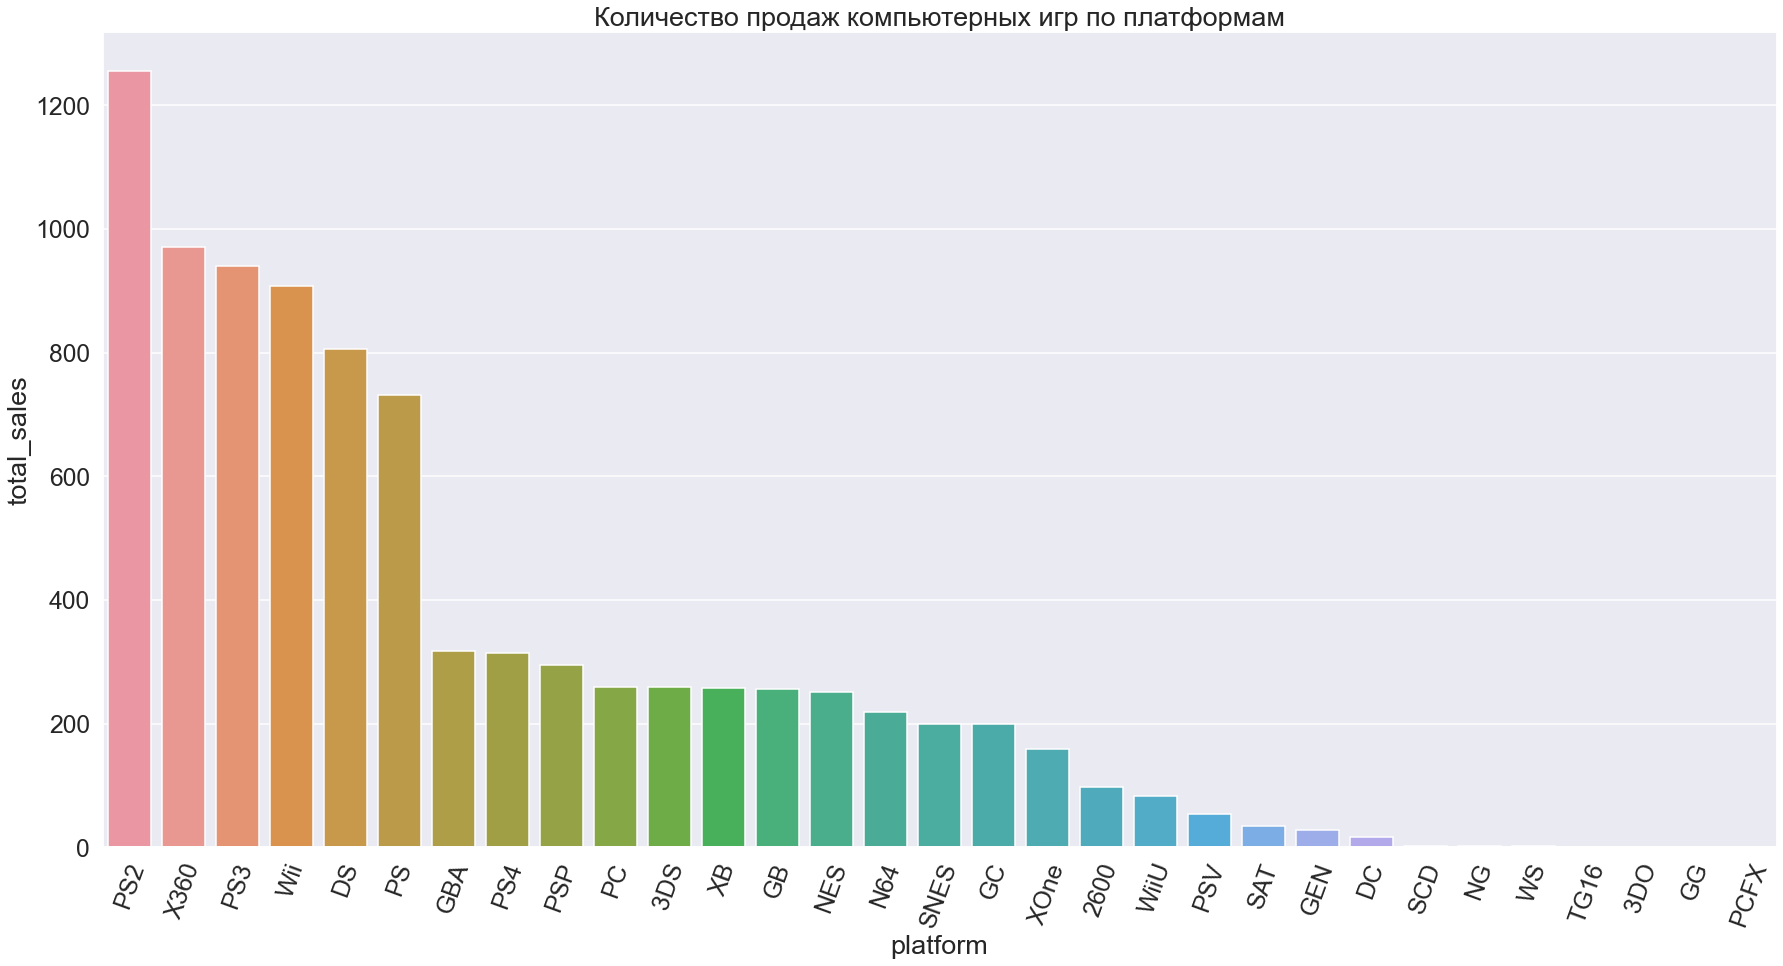

In [20]:
number_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
plt.title('Количество продаж компьютерных игр по платформам')
plt.xticks(rotation=70)
sns.barplot(x=number_sales_platform['platform'], y=number_sales_platform['total_sales'])

<AxesSubplot:title={'center':'Распределение продаж ТОП-6 во времени'}, xlabel='platform', ylabel='year_of_release'>

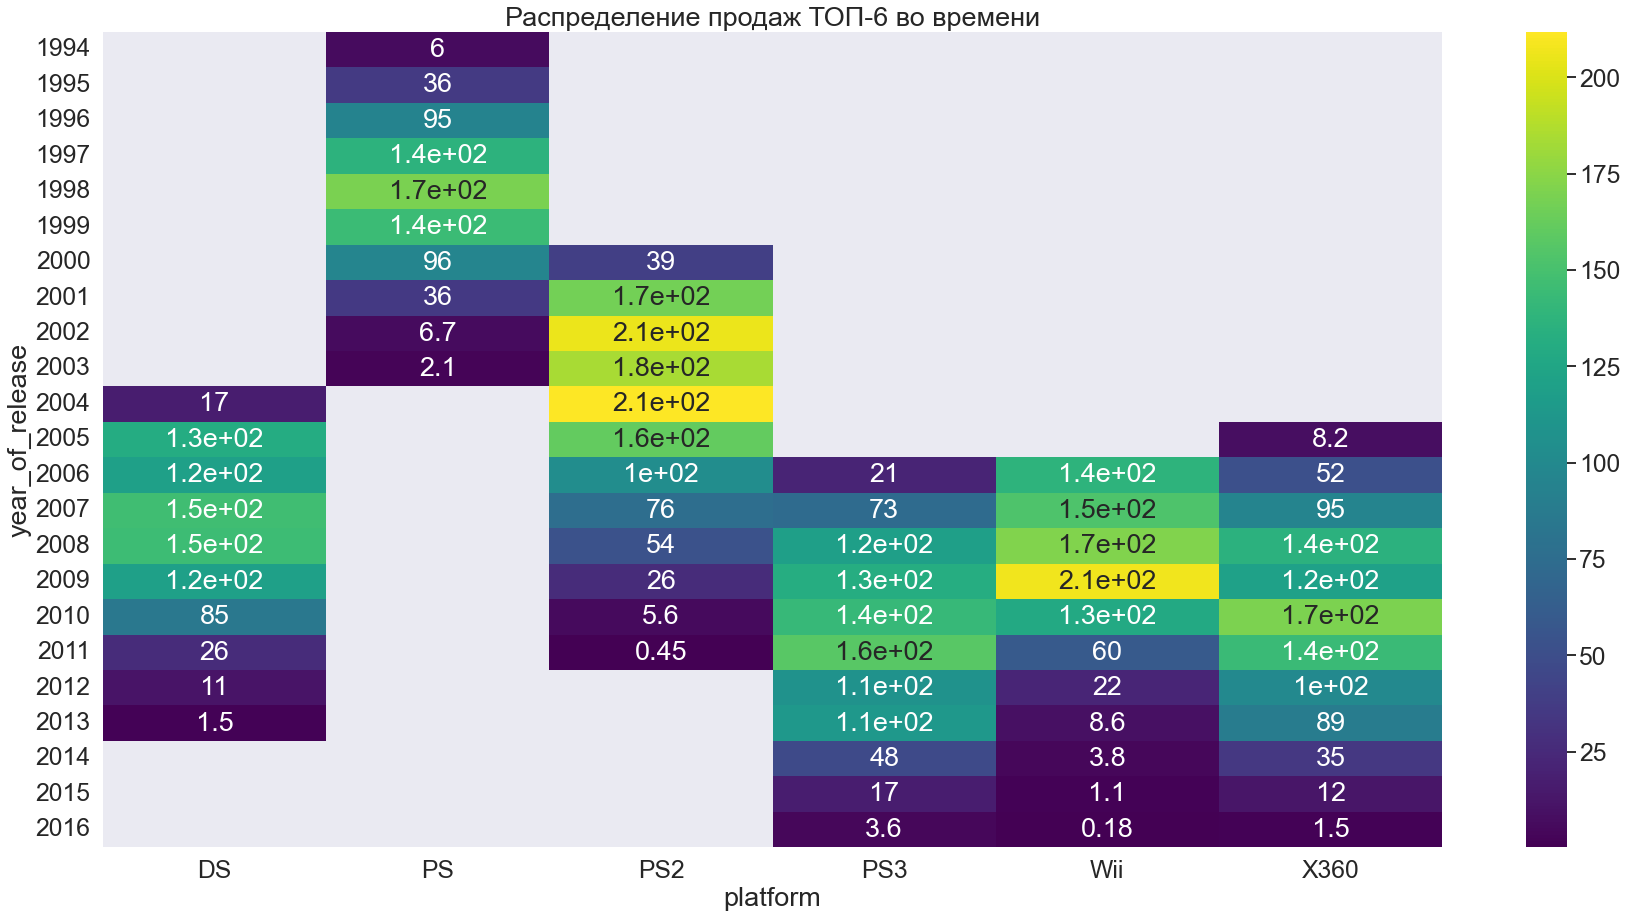

In [21]:
# список платформ с наибольшими продажами
popular_platform = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
# сформируем необходимые срезы
df_popular_platform = df.query('platform in @popular_platform')
df_popular_platform = df_popular_platform.query('year_of_release > 1989')
# сформируем сводную таблицу
analytical_table_1 = pd.pivot_table(df_popular_platform,
                                  index='year_of_release',
                                  values='total_sales',
                                  columns='platform',
                                  aggfunc='sum'
                                  )
# выведим двумерную таблицу на теплоовую карту
plt.title('Распределение продаж ТОП-6 во времени')
sns.heatmap(analytical_table_1, cmap="viridis", annot=True)

В среднем игровая платформа живет 8-9 лет. Долгожитель из ТОП-6 - платформа X360 (10 лет).
Активная фаза платформы в среднем 4 года, затем появляется свежее решение.
Самые популярные платформы:
 - по общим продажам PS2, X360, PS3
 - по пиковым годовым продажам PS2, Wii, X360
На графике видно, как агресивно вышла на рынок платформа Wii, фактически у этой платформы не было времени на раскачку.

### Шаг 3
**Определить актуальный период для прогнозирования. Основной фактор — эти данные помогут построить прогноз на 2017 год.**
Предлагаю для прогнозирования использовать последнюю выраженную тенденцию.
В нашем случае мы наблюдаем нисходящую тенденцию с 2010 года. Поэтому актуальный период для прогнозирования выбираем с 2010 по 2016 года.

In [22]:
# сформируем срез с актуальными временными границами
df_actual_1_year = df.query('year_of_release > 2015')
display(df_actual_1_year.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,critic_score_category
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85,5,E,хорошо
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,7.14,0,0,unknown,плохо
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93,8,T,отлично
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,4.47,77,3,M,норма
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,4.07,88,8,M,хорошо


### Шаг 4
**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

<AxesSubplot:title={'center':'Распределение продаж по платформам в актуальный период прошлый год'}, xlabel='platform', ylabel='year_of_release'>

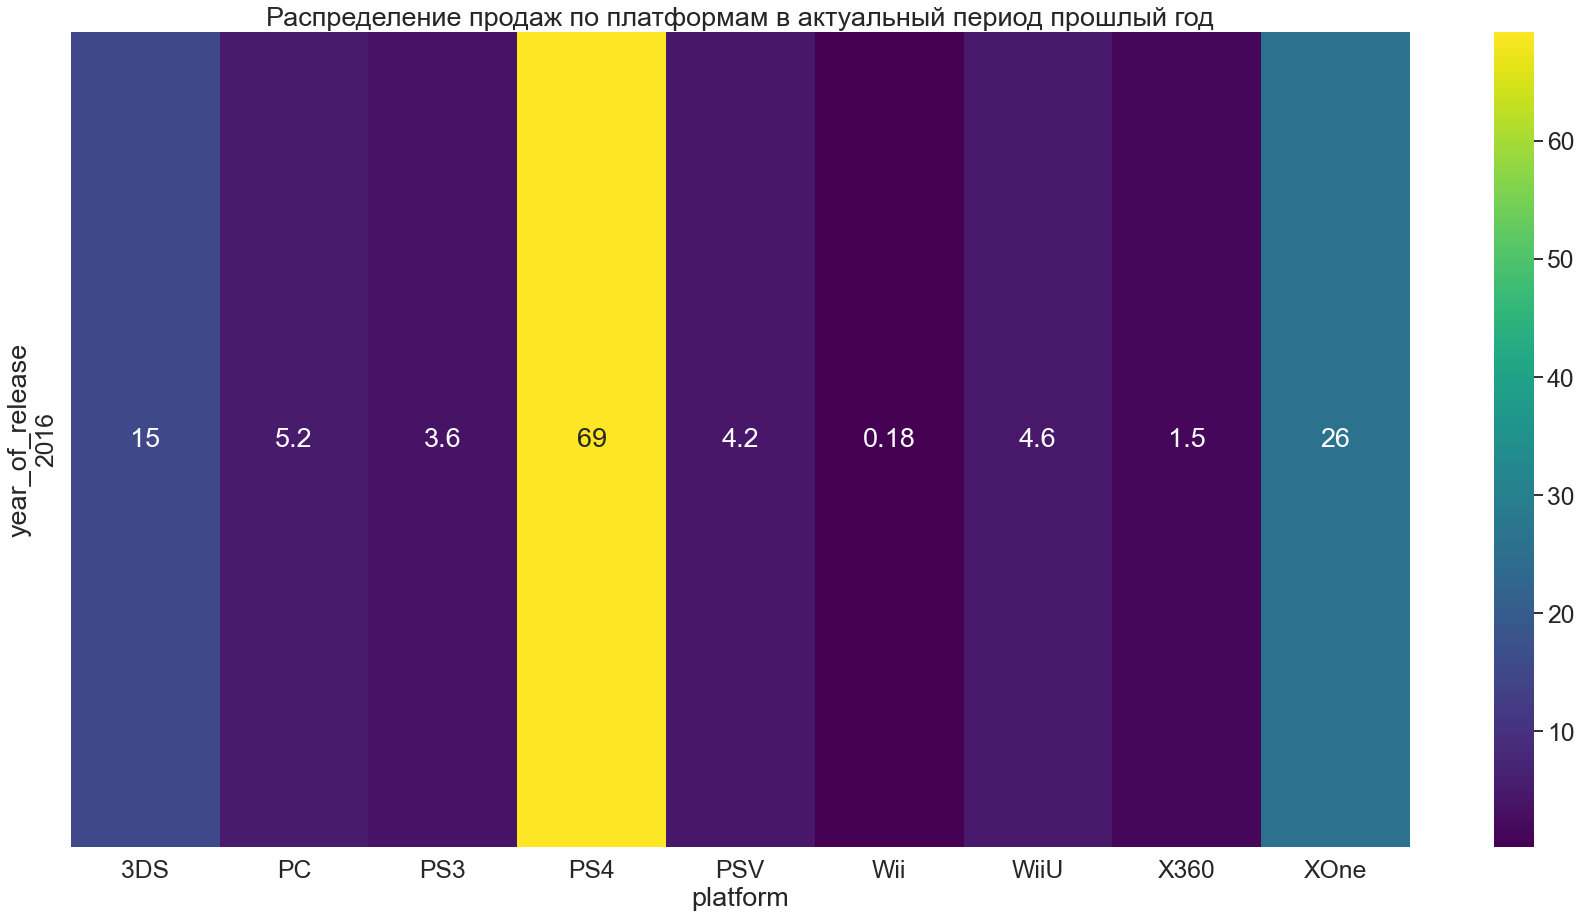

In [23]:
# сформируем сводную таблицу
analytical_table_1 = pd.pivot_table(df_actual_1_year,
                                    index='year_of_release',
                                    values='total_sales',
                                    columns='platform',
                                    aggfunc='sum'
                                    )
# выведим двумерную таблицу на теплоовую карту
plt.title('Распределение продаж по платформам в актуальный период прошлый год')
sns.heatmap(analytical_table_1, cmap="viridis", annot=True)

После сужения актуального периода до одного года тепловая карта стала менее информативная.
Мы видим, что основной игрок на рынке это платформа PS4. За ней следует платформа XOne и замыкает на нисподающем тренде (это не видно на актуальном периоде за прошлый год) платформа 3DS.
Все три платформы демонстрируют снижение уровня продаж (этого уже не скажешь по актуальному периоду за год).
Лидеры игровой индустрии: PS3, X360 уже к 2015 году потеряли свои позиции (актуальный период за прошлый год не дает это четко увидеть).
За тройкой лидеров следуют игры для PC, однако объемы продаж для PC значительно ниже лидеров.

<AxesSubplot:title={'center':'Распределение продаж по платформам в актуальный период три года'}, xlabel='platform', ylabel='year_of_release'>

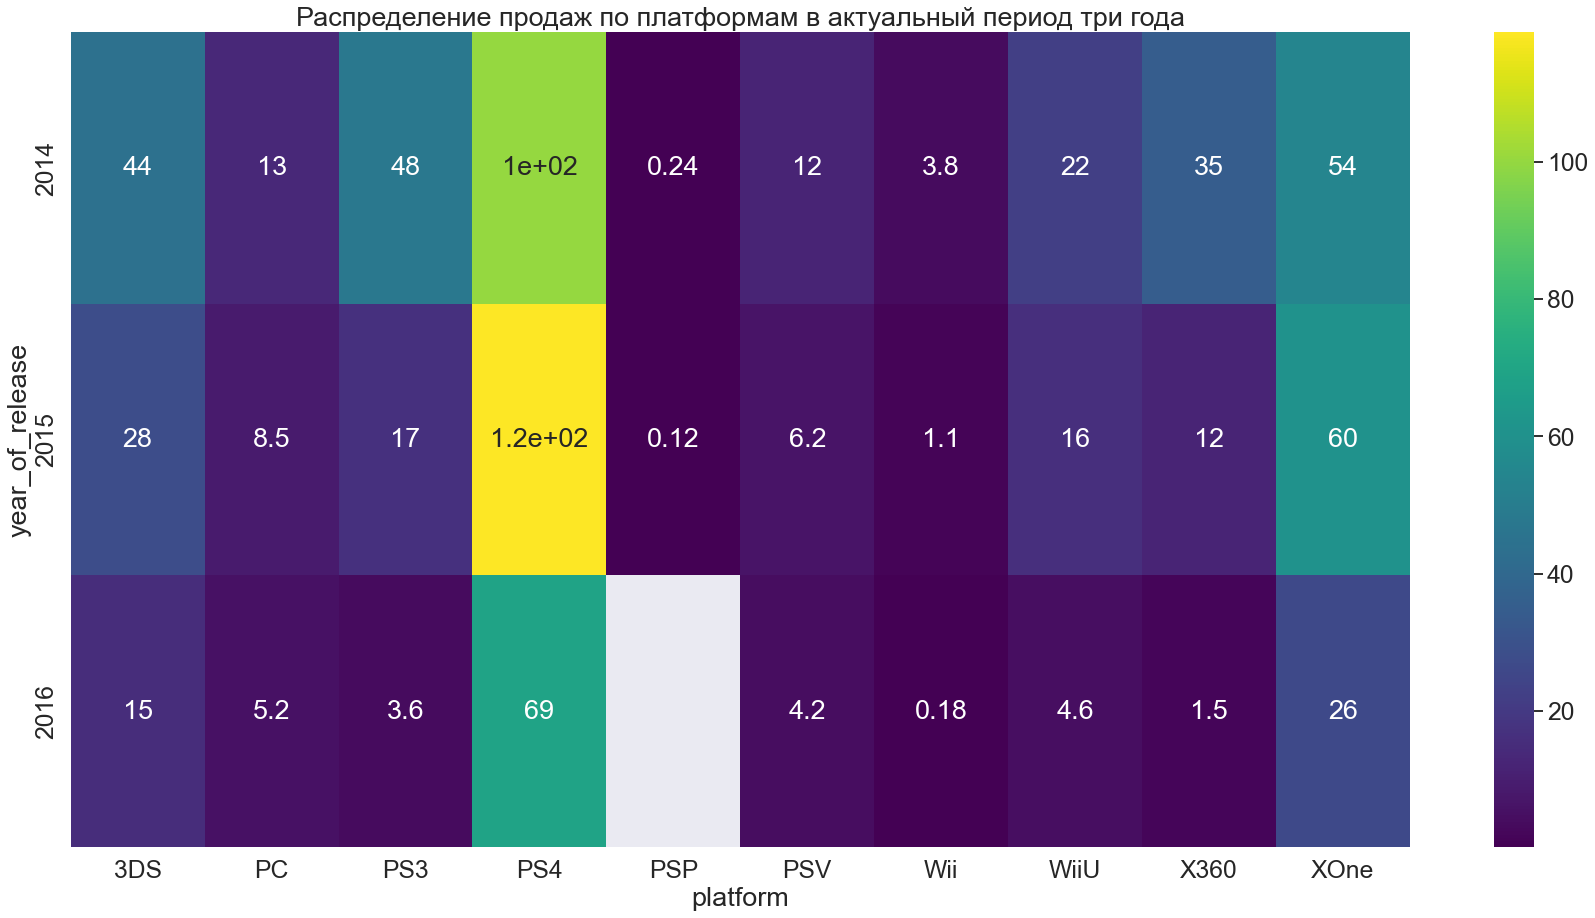

In [24]:
# для сравнения построим тепловую карту за последние три года
# сформируем срез с актуальными временными границами
df_actual_3_year = df.query('year_of_release > 2013')

# сформируем сводную таблицу
analytical_table_1 = pd.pivot_table(df_actual_3_year,
                                    index='year_of_release',
                                    values='total_sales',
                                    columns='platform',
                                    aggfunc='sum'
                                    )
# выведим двумерную таблицу на теплоовую карту
plt.title('Распределение продаж по платформам в актуальный период три года')
sns.heatmap(analytical_table_1, cmap="viridis", annot=True)

Здесь мы отчетливо видим нисходящее движение продаж по всем лидерам: PS4, XOne, 3DS, PC

### Шаг 5
**График «ящик с усами» по глобальным продажам игр в разбивке по платформам в актуальный период 1 год.**

<AxesSubplot:title={'center':'Распределение продаж по платформам в актуальный период 1 год'}, xlabel='platform', ylabel='total_sales'>

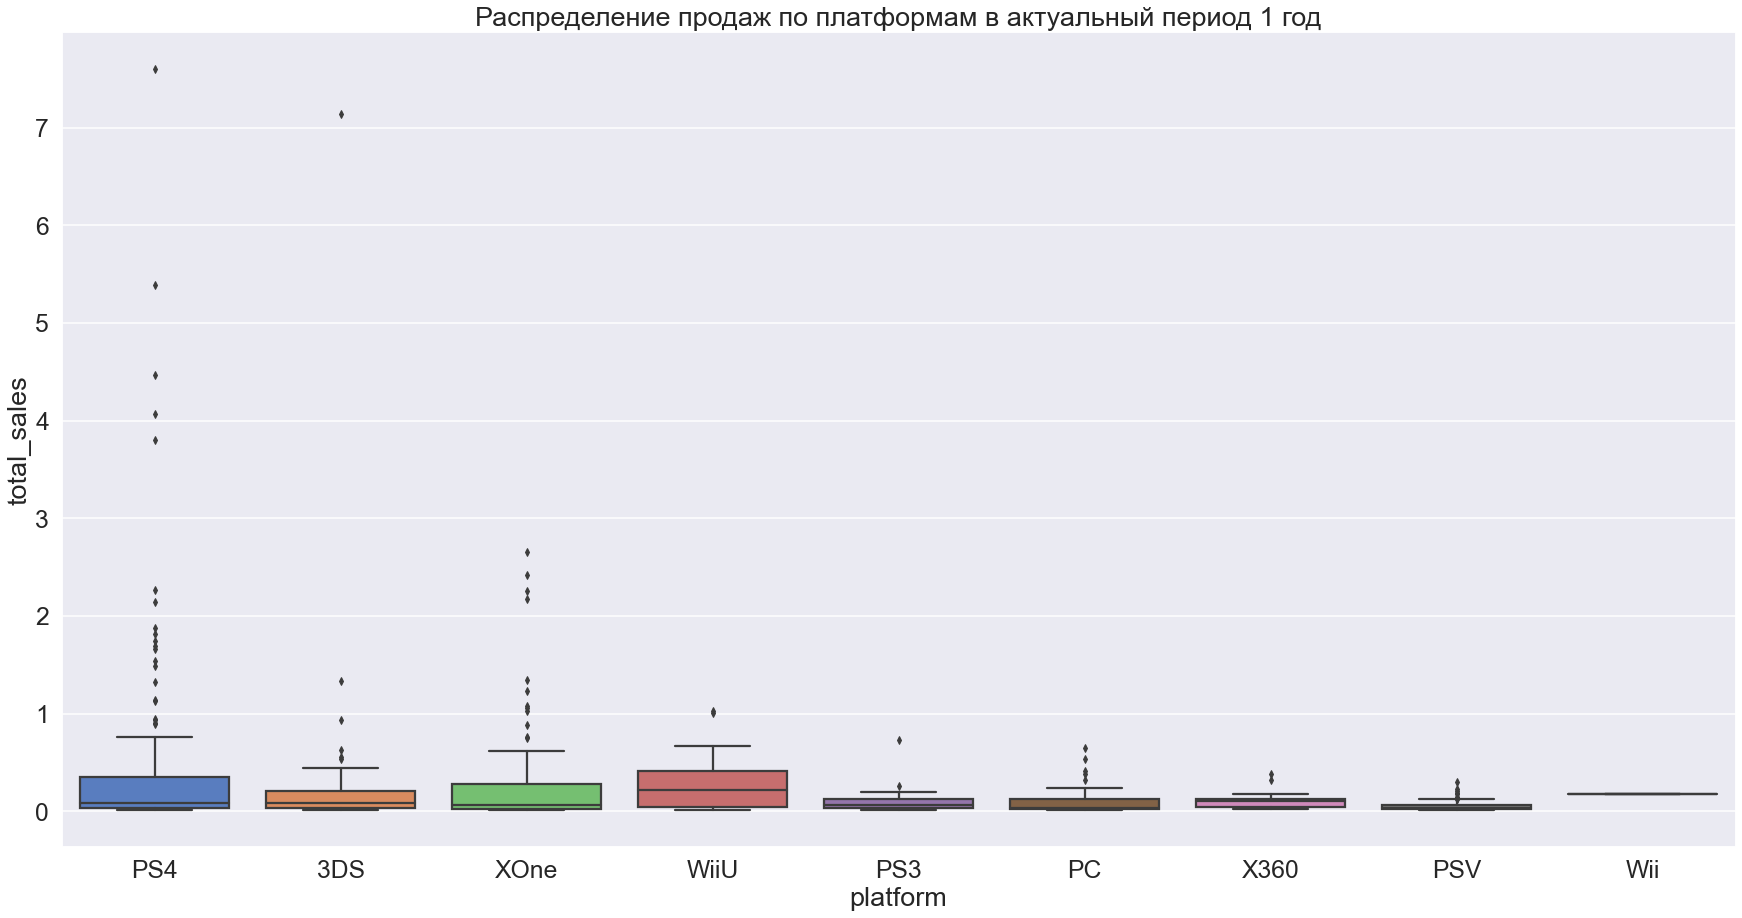

In [25]:
plt.title('Распределение продаж по платформам в актуальный период 1 год')
sns.boxplot(x='platform', y='total_sales', data=df_actual_1_year)

Мы видим, что лидирующие позиции платформам: PS4, 3DS, XOne обеспечивают отдельные,  наиболее популярные игры (выбросы на графиках).
Интересно взглянуть на эти игры (выбросы).

<AxesSubplot:title={'center':'Количество продаж компьютерных игр на платформе PS4'}, xlabel='name', ylabel='total_sales'>

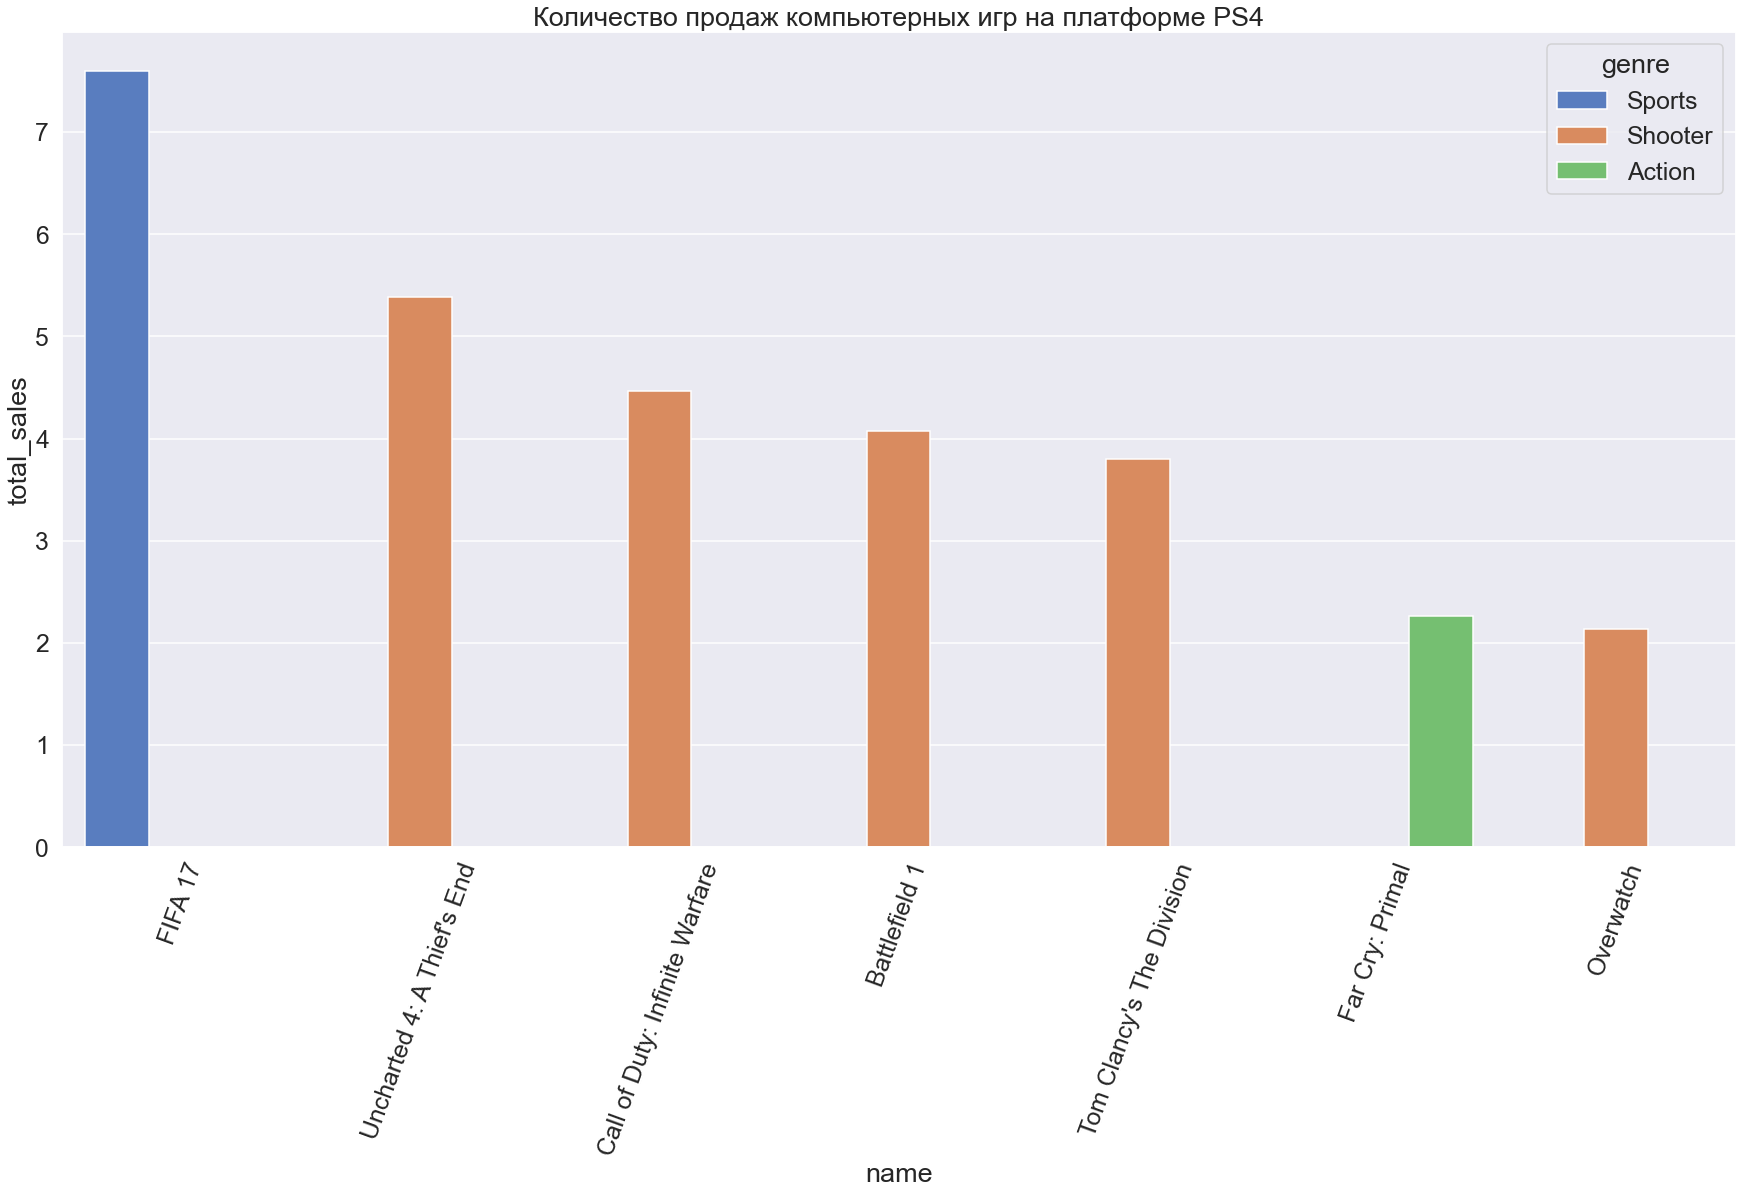

In [26]:
# платформа PS4
df_ps4 = df_actual_1_year.loc[(df_actual_1_year['platform'] == 'PS4') & (df_actual_1_year['total_sales'] > 2.0)]
plt.title('Количество продаж компьютерных игр на платформе PS4')
plt.xticks(rotation=70)
sns.barplot(x=df_ps4['name'], y=df_ps4['total_sales'], hue=df_ps4['genre'])

<AxesSubplot:title={'center':'Количество продаж компьютерных игр на платформе 3DS'}, xlabel='name', ylabel='total_sales'>

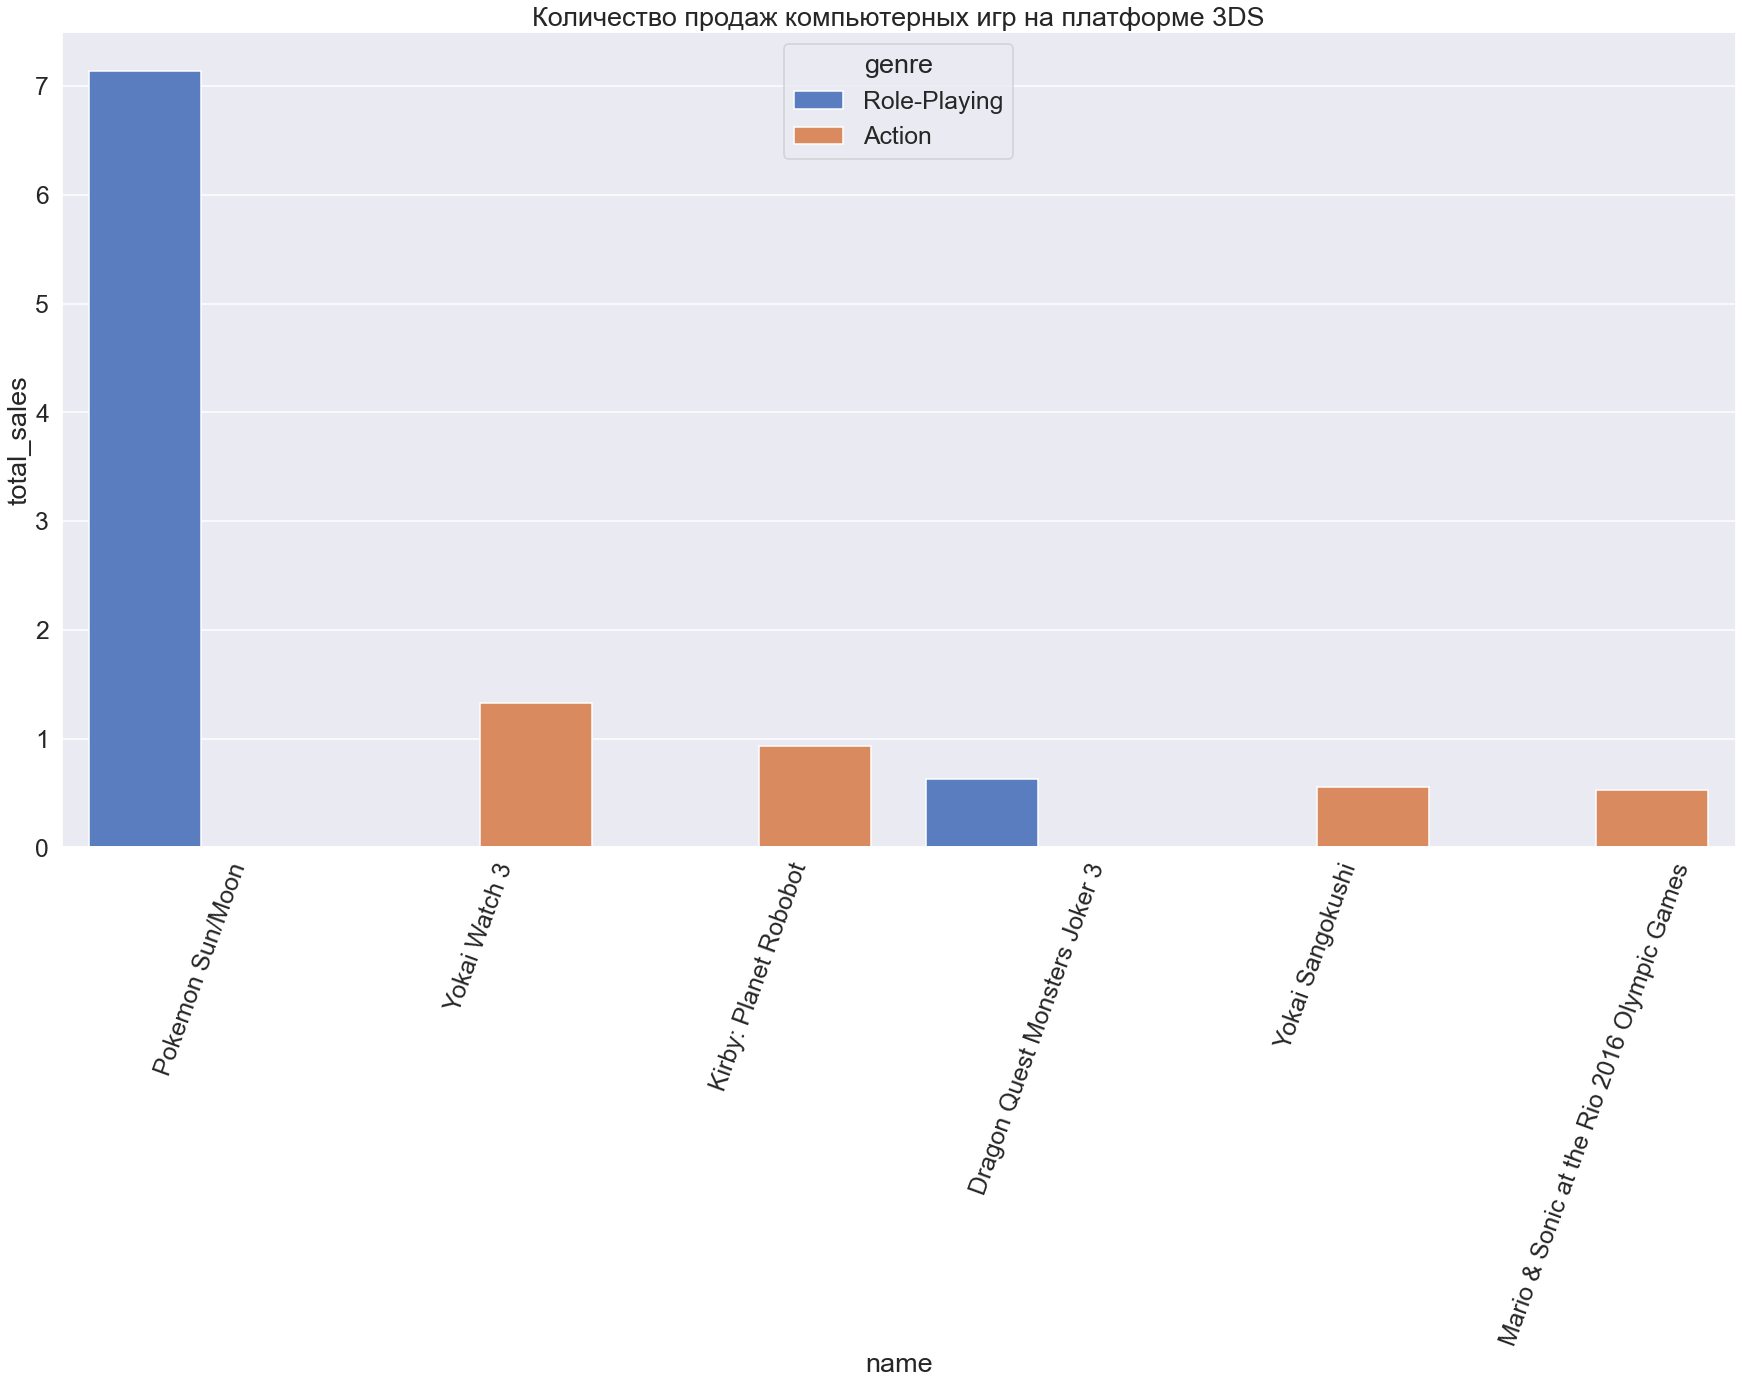

In [27]:
# платформа 3DS
df_3ds = df_actual_1_year.loc[(df_actual_1_year['platform'] == '3DS') & (df_actual_1_year['total_sales'] > 0.5)]
plt.title('Количество продаж компьютерных игр на платформе 3DS')
plt.xticks(rotation=70)
sns.barplot(x=df_3ds['name'], y=df_3ds['total_sales'], hue=df_3ds['genre'])

<AxesSubplot:title={'center':'Количество продаж компьютерных игр на платформе XOne'}, xlabel='name', ylabel='total_sales'>

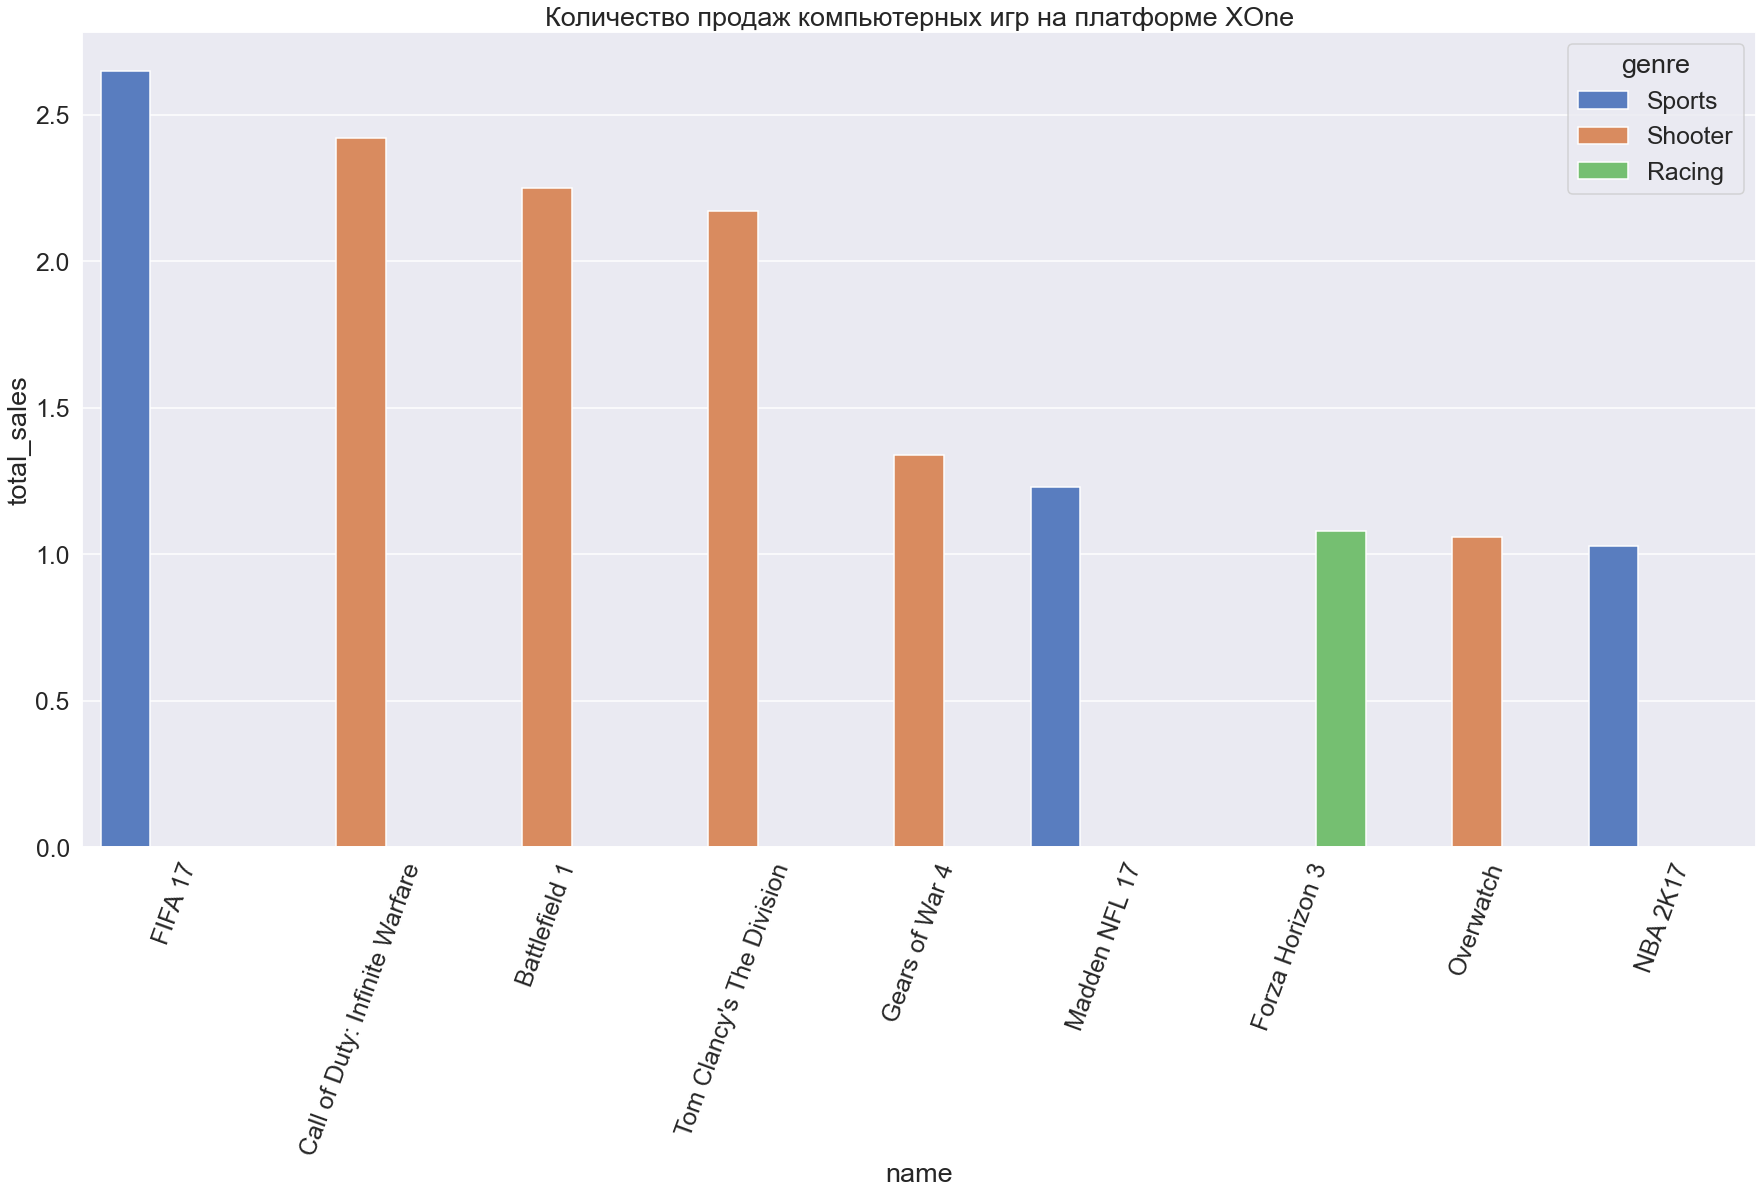

In [28]:
# платформа XOne
df_xone = df_actual_1_year.loc[(df_actual_1_year['platform'] == 'XOne') & (df_actual_1_year['total_sales'] > 1.0)]
plt.title('Количество продаж компьютерных игр на платформе XOne')
plt.xticks(rotation=70)
sns.barplot(x=df_xone['name'], y=df_xone['total_sales'], hue=df_xone['genre'])

<AxesSubplot:title={'center':'Количество продаж компьютерных игр на платформе PC'}, xlabel='name', ylabel='total_sales'>

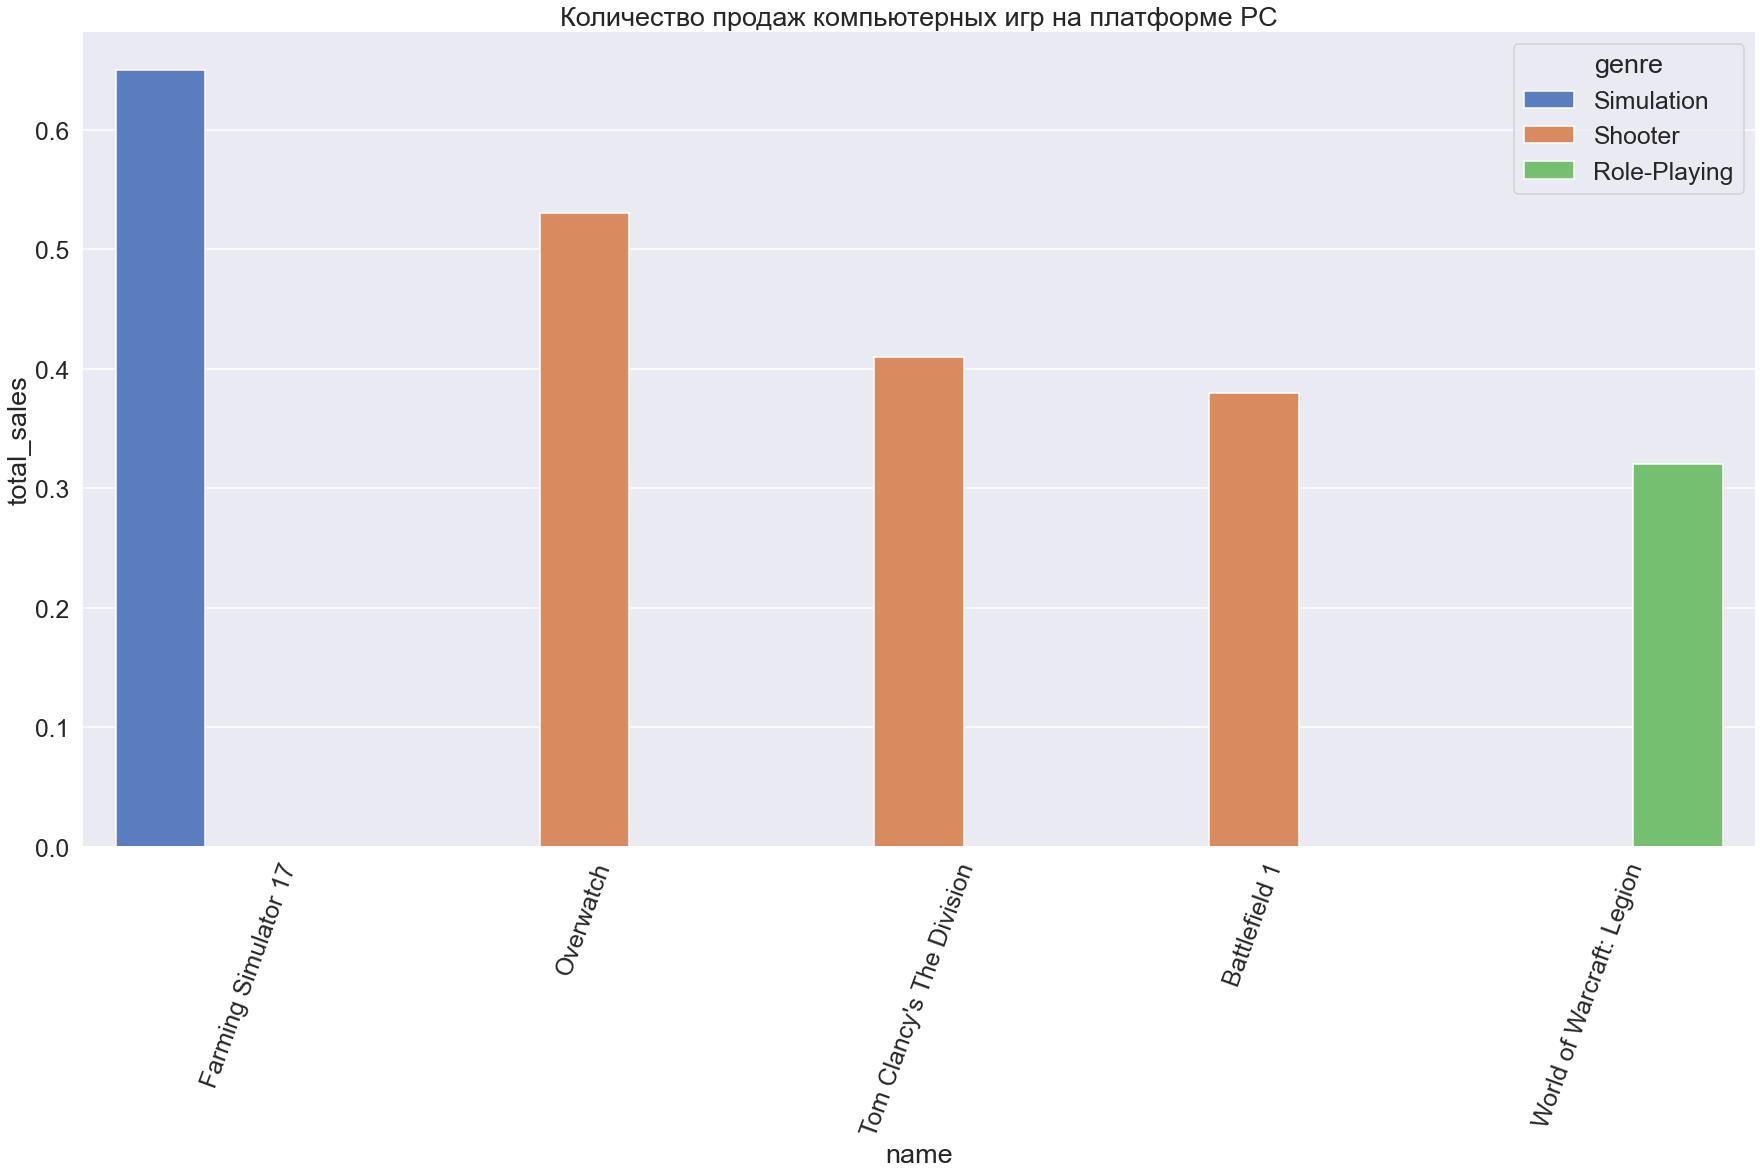

In [29]:
# платформа PC
df_pc = df_actual_1_year.loc[(df_actual_1_year['platform'] == 'PC') & (df_actual_1_year['total_sales'] > 0.3)]
plt.title('Количество продаж компьютерных игр на платформе PC')
plt.xticks(rotation=70)
sns.barplot(x=df_pc['name'], y=df_pc['total_sales'], hue=df_pc['genre'])

Как видим приоритеты пользователей в зависимости от платформы разделились.
- Явно выделяется из общей картины платформа 3DS с играми в жанре **ROLE-PLAING**, которая наиболее популярна в восточных регионах. Я разделяю теорию цивилизаций Данилевского, которая и здесь имеет свое подтверждение. Цивилизация Желтой расы демонстрирует свою индивидуальность. Интересно будет взглянуть на портрет региона JP.
- Кстати, Индоевропейская цивилизация, как цивилизация воинов, также демонстрирует свой генотип. Наиболее популярны игры в жанре **SHOOTER** (практически по Фрейду), за этим жанром следуют игры в жанре **SPORTS** (опять же по Фрейду, реализация на уровне подсознательного воинских качеств: состязательность, первенство, аскетизм). Опять же, интересно будет взглянуть на портреты регионов NA, EU.
- Интересный срез по платформе PC. Кроме общепопулярных игр в жанре **SHOOTER** мы наблюдаем приоритеты пользователей к играм-симуляторам. Интересно, с чем связана популярность симуляторов именно на настольных компьютерах. Возможно это связано с возможностью тонкой настройки симулятора с помощью клавиатуры, чего не добьешься от геймпада...

### Шаг 6
**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами.**


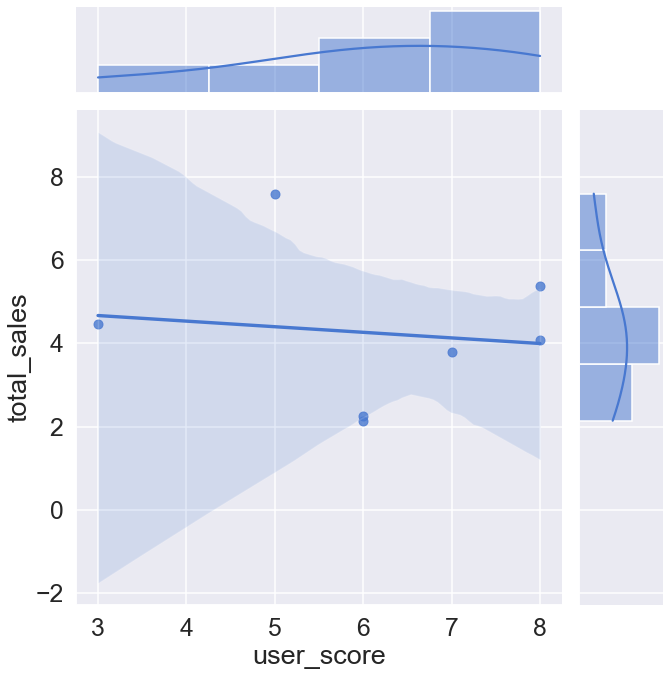

In [30]:
# возьмем для анализа самую популярную платформу за актуальный период - PS4
# представим графически зависимость объемов продаж от отзывов пользователей
sns.jointplot(x=df_ps4['user_score'], y=df_ps4['total_sales'], height=10, kind='reg')

График зависимости продаж от отзывов пользователей демонстрирует слабо выраженную отрицательную регрессию.
Распределение оценок имеет левое искажение.
Распределение объемов продаж имеет правое искажение.

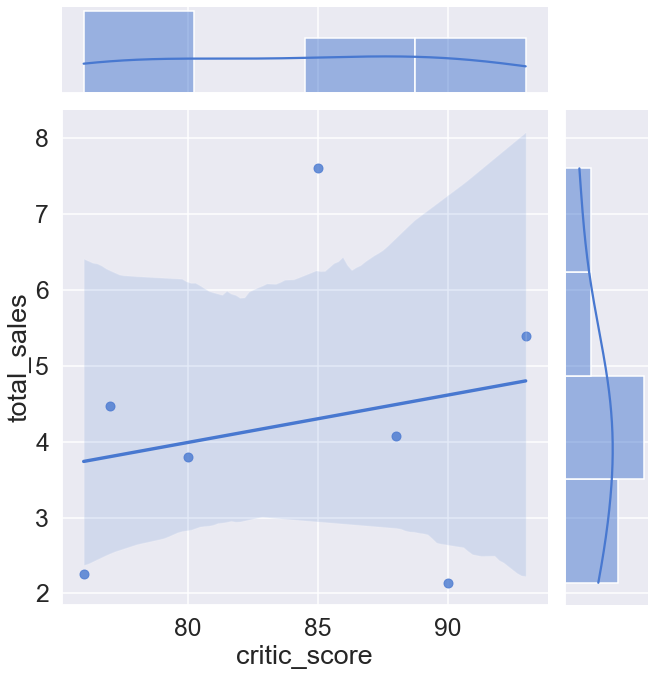

In [31]:
# представим графически зависимость объемов продаж от отзывов критиков
sns.jointplot(x=df_ps4['critic_score'], y=df_ps4['total_sales'], height=10, kind='reg')

График зависимости продаж от отзывов критиков демонстрирует выраженную положительную регрессию.


In [32]:
# рассчитаем коэффициенты корреляции
print(df_ps4[['total_sales', 'user_score', 'critic_score']].corr())

              total_sales  user_score  critic_score
total_sales      1.000000   -0.126841      0.219774
user_score      -0.126841    1.000000      0.594527
critic_score     0.219774    0.594527      1.000000


Матрица подтверждает графические изображения.
Коэффициент корреляции `total_sales`/ `user_score` отрицательный, равен -0.13, что говорит о слабой отрицательной зависимости.
Коэффициент корреляции `total_sales` / `critic_score` положительный, равен 0.22, что также говорит о слабой положительной зависимости.

### Шаг 7
**Сравнение с продажами игр на других платформах.**

<AxesSubplot:title={'center':'Зависимость продаж от отзывов пользователей в разрезе популярных платформ'}, xlabel='user_score', ylabel='total_sales'>

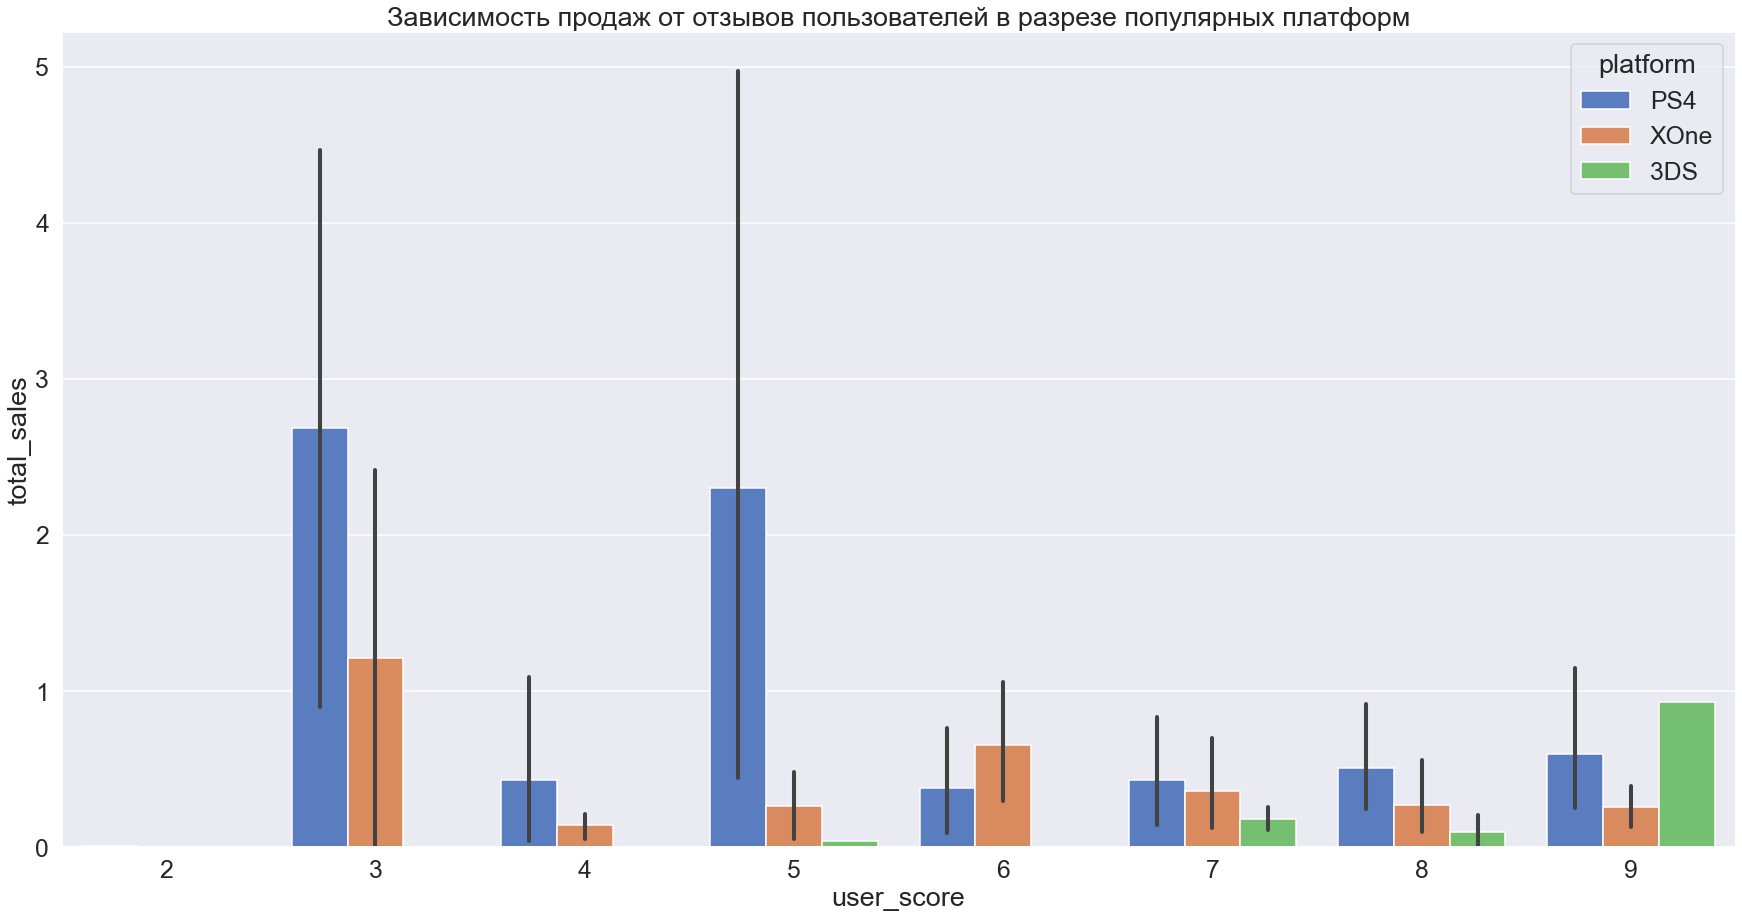

In [33]:
# сформируем датафрейм из популярных платформ в актуальном периоде
popular_platform_actual = ['PS4','XOne', '3DS']
df_popular_platform_actual = df_actual_1_year.query('platform in @popular_platform_actual and user_score > 0 and critic_score > 0')
# выведим график распределения продаж по платформам и оценкам пользователей
plt.title('Зависимость продаж от отзывов пользователей в разрезе популярных платформ')
sns.barplot(x=df_popular_platform_actual['user_score'], y=df_popular_platform_actual['total_sales'], hue=df_popular_platform_actual['platform'], dodge=True)

В разрезе по платформам можно выделить положительную зависимость продаж от отзывов пользователей у бренда **3DS**
Остальные платформы демонстрируют слабую отрицательную зависимость, что подтверждает предыдущий анализ.

<AxesSubplot:title={'center':'Зависимость продаж от отзывов критиков в разрезе популярных платформ'}, xlabel='critic_score_category', ylabel='total_sales'>

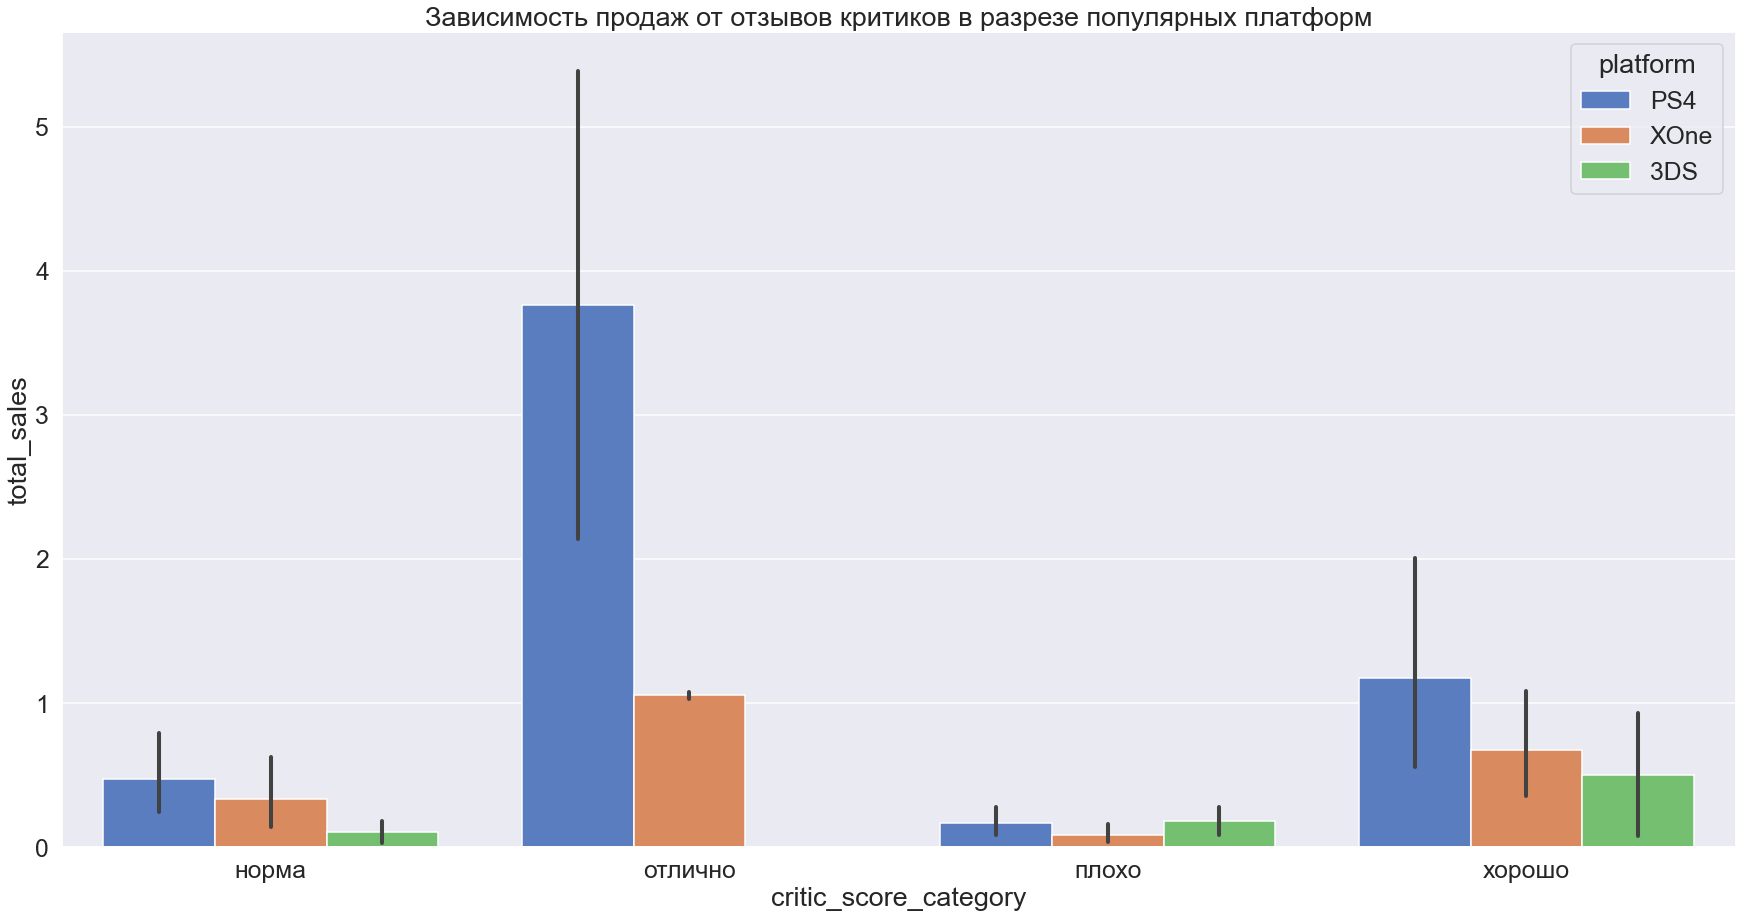

In [34]:
plt.title('Зависимость продаж от отзывов критиков в разрезе популярных платформ')
sns.barplot(x=df_popular_platform_actual['critic_score_category'], y=df_popular_platform_actual['total_sales'], hue=df_popular_platform_actual['platform'], dodge=True)

Данный график в общем подтверждает положительную зависимость продаж от критических отзывов.

### Шаг 8
**Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

<AxesSubplot:title={'center':'Количество продаж компьютерных игр по жанрам в актуальный период 1 год'}, xlabel='genre', ylabel='total_sales'>

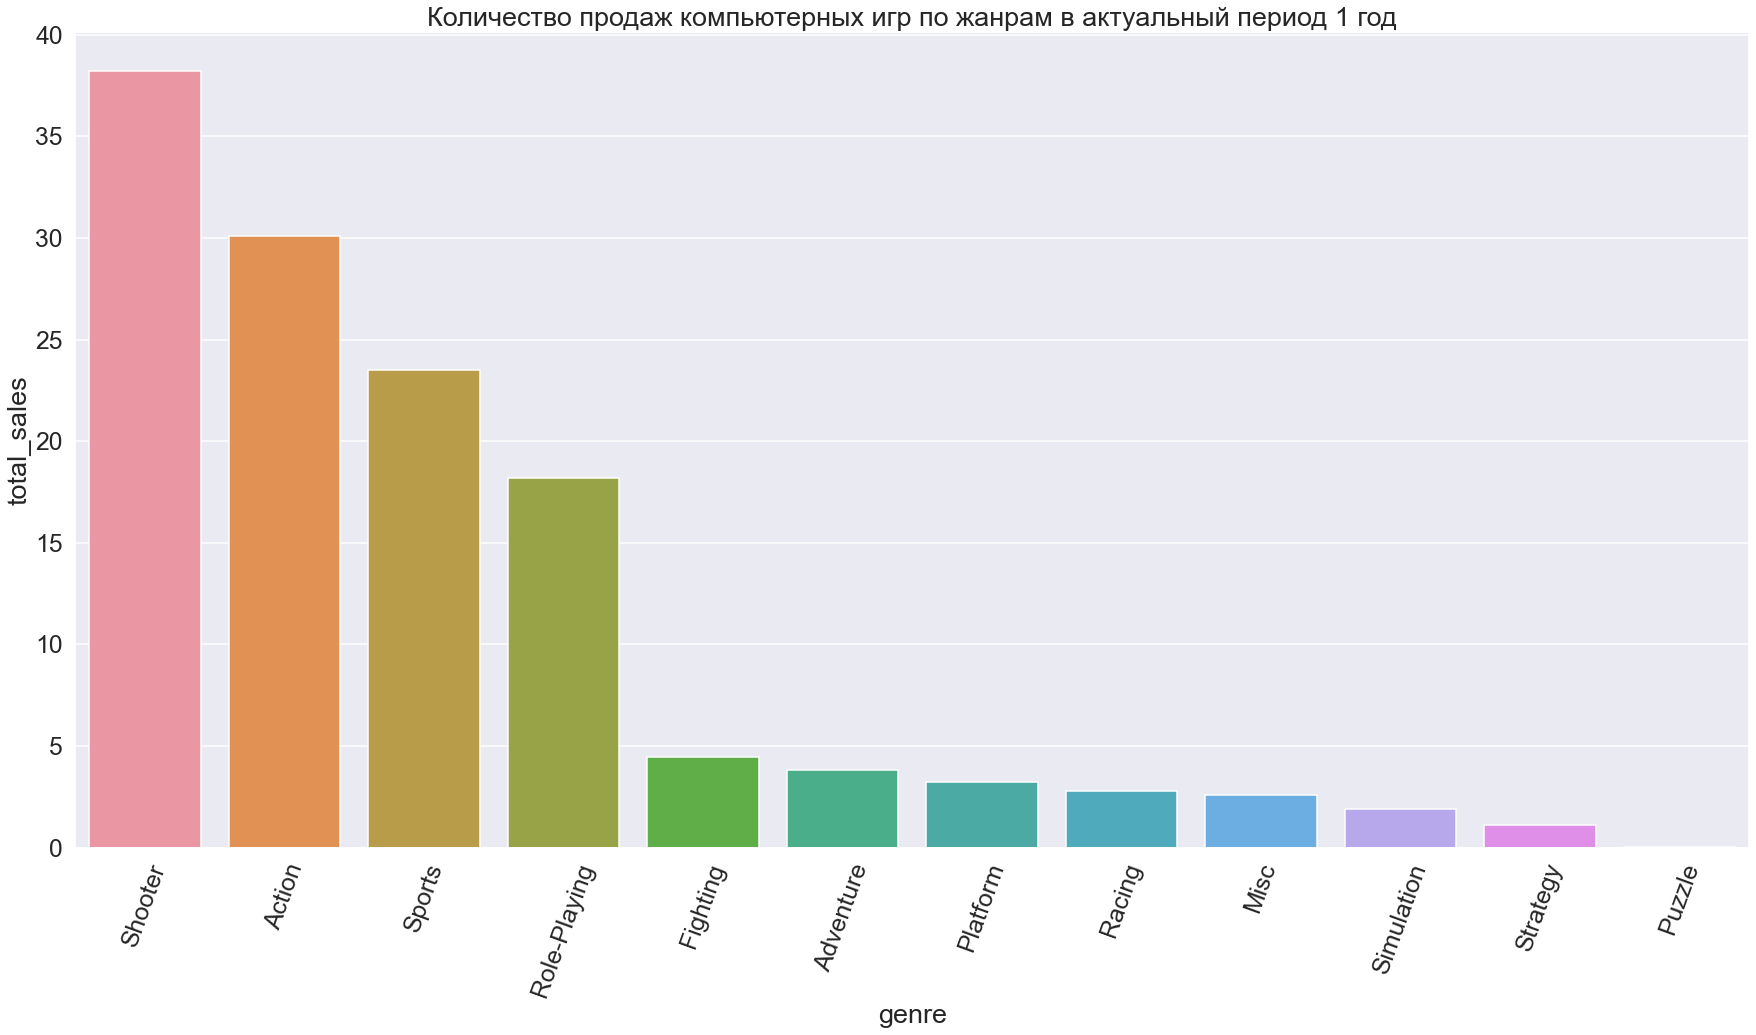

In [35]:
number_sales_genre = df_actual_1_year.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
plt.title('Количество продаж компьютерных игр по жанрам в актуальный период 1 год')
plt.xticks(rotation=70)
sns.barplot(x=number_sales_genre['genre'], y=number_sales_genre['total_sales'])

Самые популярные жанры по общим продажам:
- 1  **Shooter**
- 2  **Action**
- 3  **Sports**

Жанры с саммыми низкими общими продажами:
- 1  **Strategy**
- 2  **Simulation**
- 3  **Misc**

<AxesSubplot:title={'center':'Медианные продажи компьютерных игр по жанрам в актуальный период 1 год'}, xlabel='genre', ylabel='total_sales'>

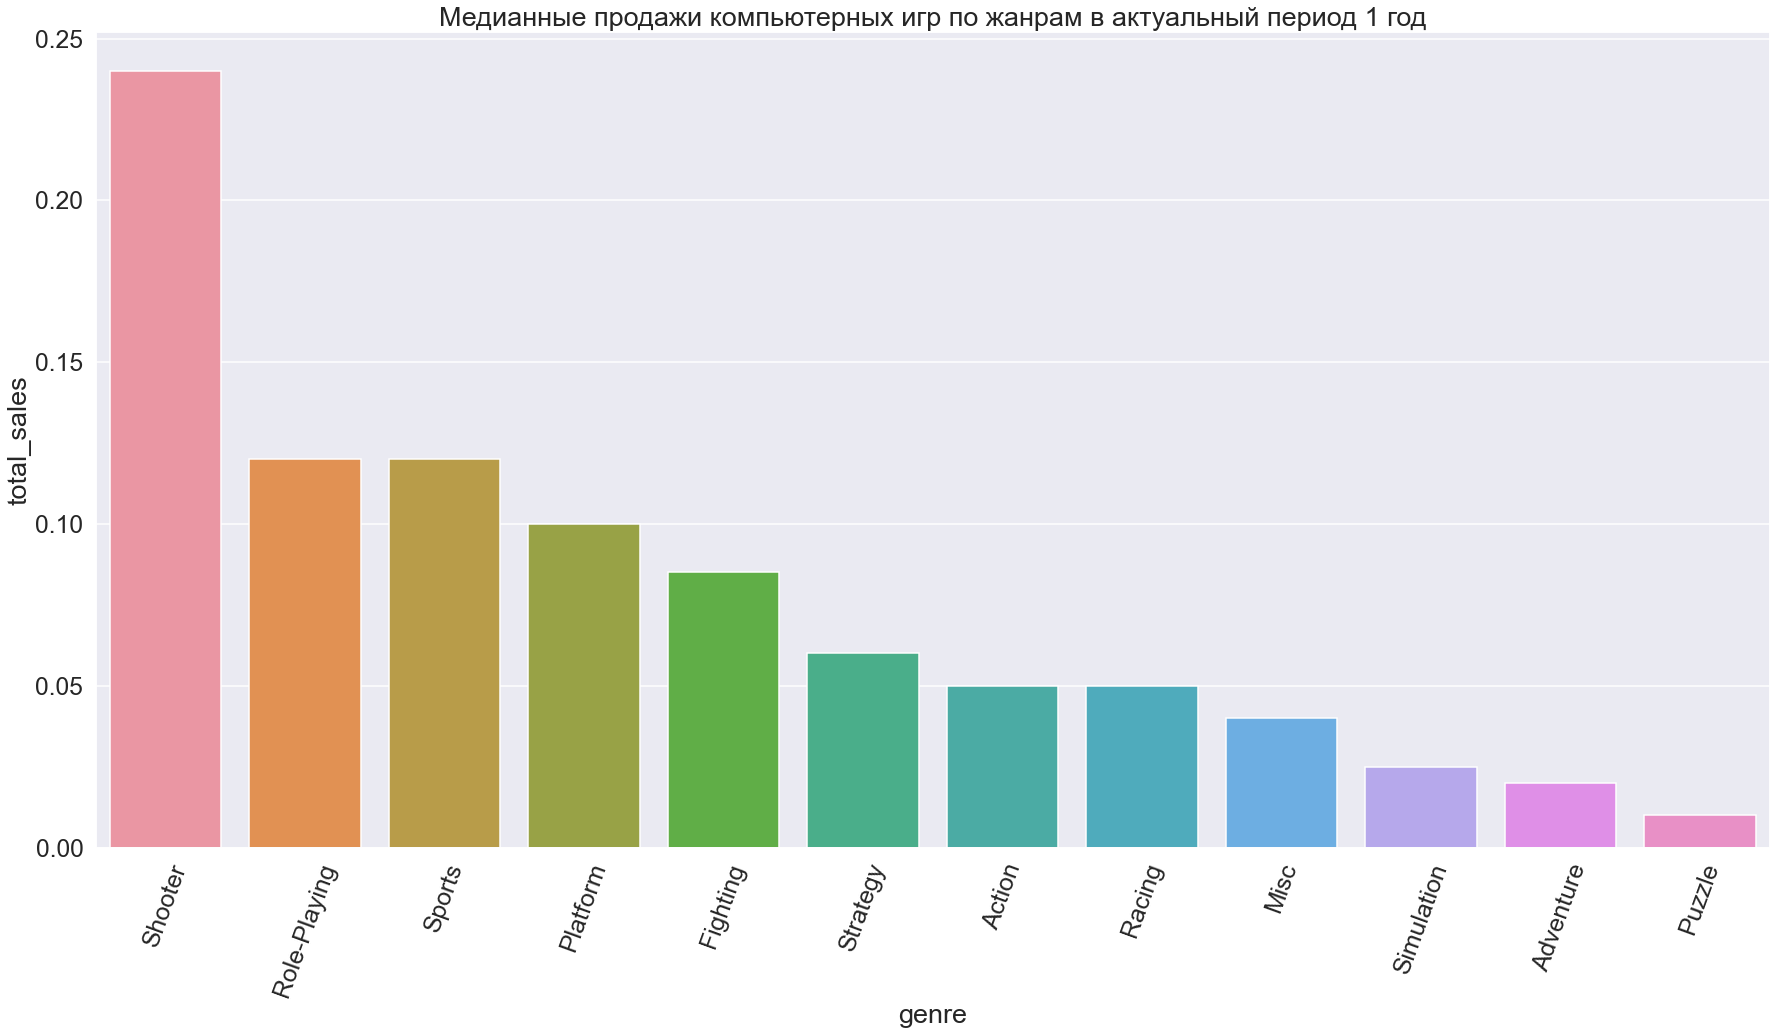

In [36]:
median_sales_genre = df_actual_1_year.groupby('genre')['total_sales'].median().reset_index().sort_values(by='total_sales', ascending=False)
plt.title('Медианные продажи компьютерных игр по жанрам в актуальный период 1 год')
plt.xticks(rotation=70)
sns.barplot(x=median_sales_genre['genre'], y=median_sales_genre['total_sales'])

### Вывод
На этапе исследовательского анализа данных:
- определили актуальный перимод для прогнозирования продаж на следующий год;
- определили лидирующии игровые платформы в актуальный период: **PS4, XOne, 3DS, PC**;
- выяснили востребованные жанры: **Shooter, Role-Playing, Sports**;
- выяснили жанры аутсайдеры: **Puzzle, Adventure, Simulation**;
- выяснили зависимость продаж в игровой индустрии от оценок пользователей и оценок критиков;
- выяснмлм наиболее популярные жанры на конкретных платформах.

## Портрет пользователя по регионам
### Регион NA
#### Самые популярные платформы (ТОП-5)

In [37]:
sales_platform_na = df_actual_1_year.groupby('platform')['na_sales'].sum().reset_index().rename(columns={'na_sales': 'total_sales_na'}).sort_values(by='total_sales_na', ascending=False)
print('ТОП-5 платформ в регионе NA:', *sales_platform_na['platform'].head(), sep='\n')

ТОП-5 платформ в регионе NA:
PS4
XOne
3DS
WiiU
PC


<AxesSubplot:title={'center':'Распределение продаж в регионе NA по платформам'}, xlabel='platform', ylabel='total_sales_na'>

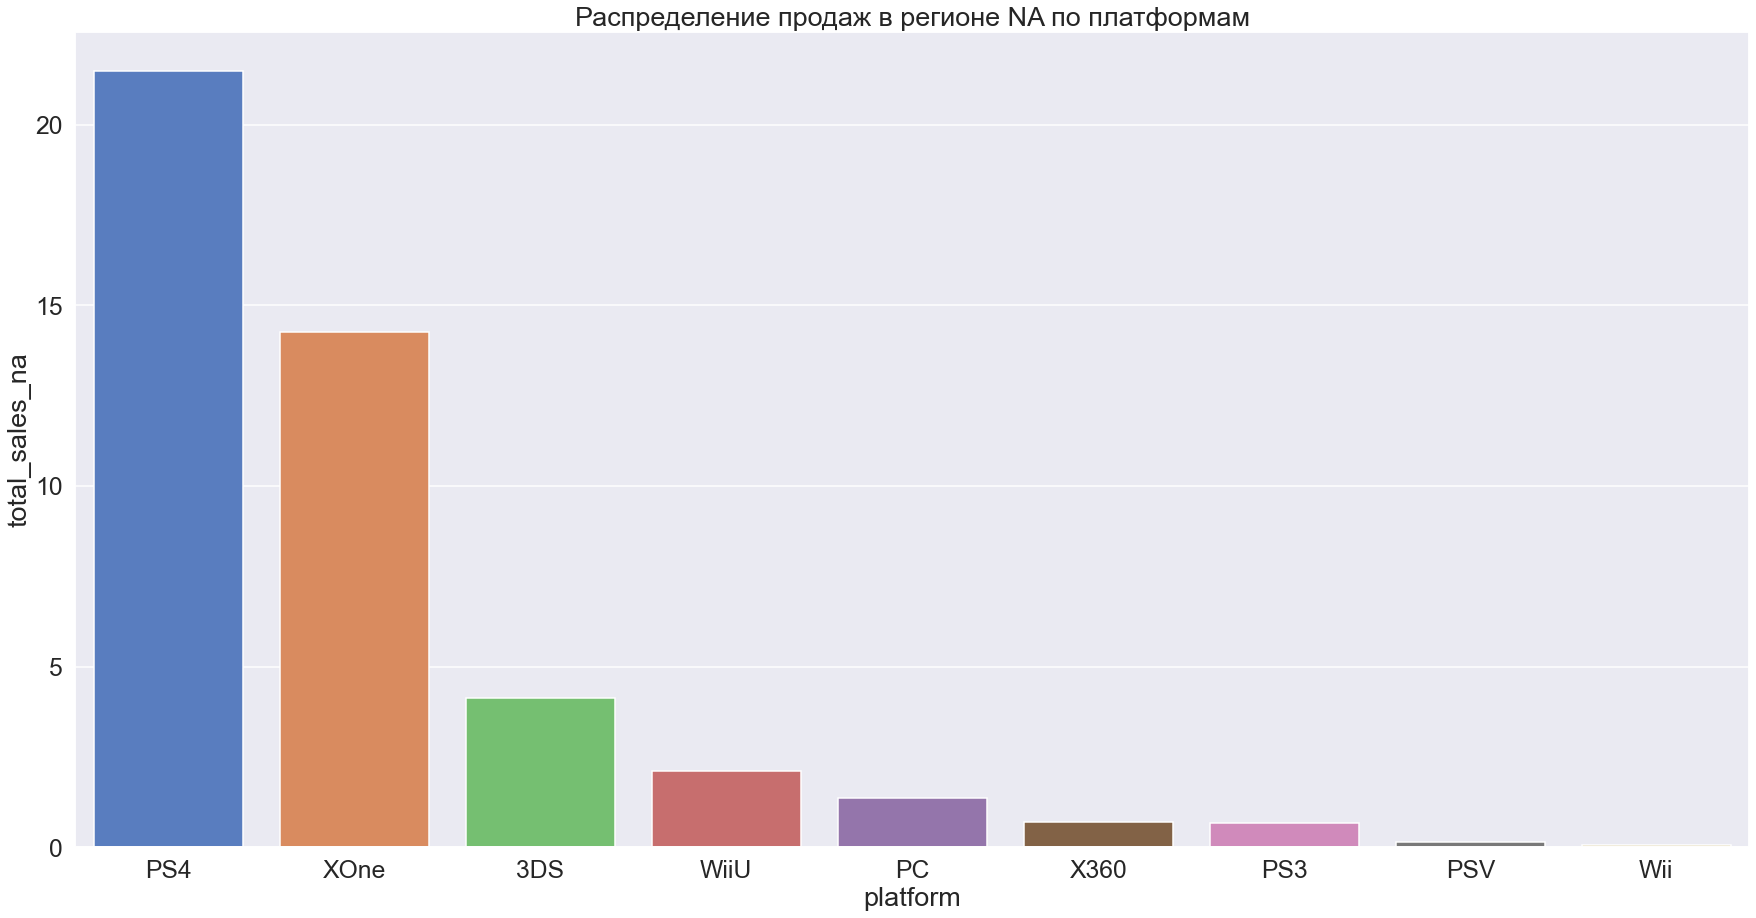

In [38]:
# выполним срез без нулевых значений
sales_platform_na = sales_platform_na.query('total_sales_na > 0')
plt.title('Распределение продаж в регионе NA по платформам')
sns.barplot(x=sales_platform_na['platform'], y=sales_platform_na['total_sales_na'])

#### Самые популярные жанры (ТОП-5)

In [39]:
sales_genre_na = df_actual_1_year.groupby('genre')['na_sales'].sum().reset_index().rename(columns={'na_sales': 'total_sales_na'}).sort_values(by='total_sales_na', ascending=False)
print('ТОП-5 жанров в регионе NA:', *sales_genre_na['genre'].head(), sep='\n')

ТОП-5 жанров в регионе NA:
Shooter
Action
Sports
Role-Playing
Fighting


<AxesSubplot:title={'center':'Распределение продаж в регионе NA по жанрам'}, xlabel='genre', ylabel='total_sales_na'>

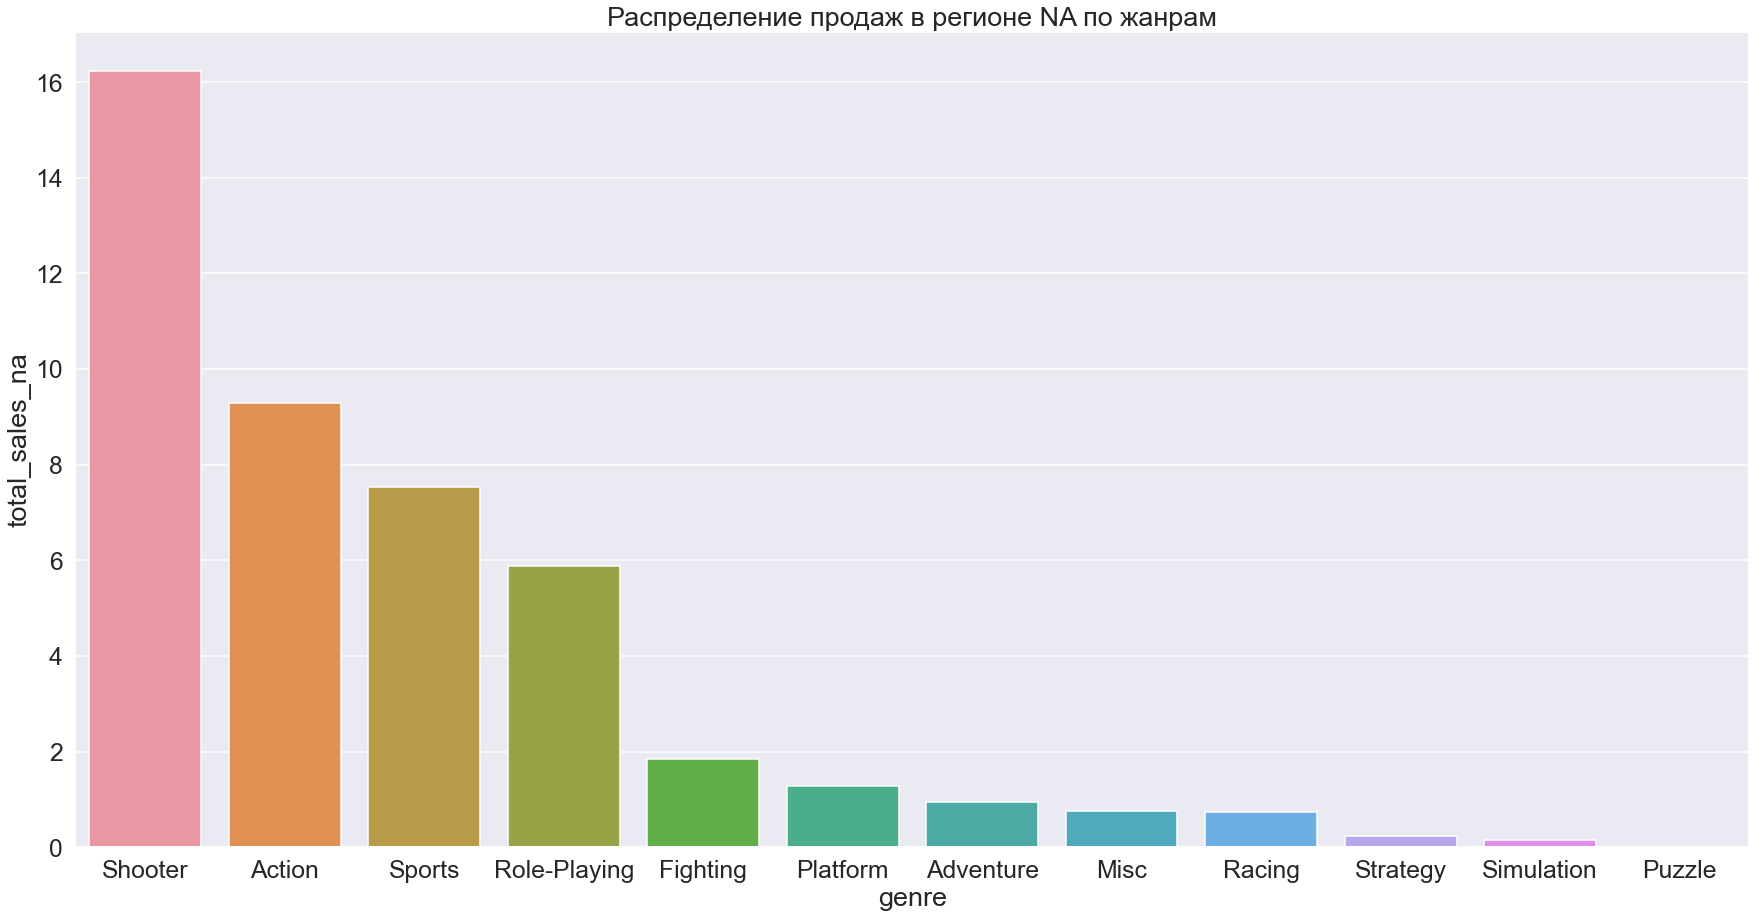

In [40]:
plt.title('Распределение продаж в регионе NA по жанрам')
sns.barplot(x=sales_genre_na['genre'], y=sales_genre_na['total_sales_na'])

#### Влияние рейтинга ESRB на продажи

In [41]:
dependence_sales_rating_na = df_actual_1_year.query('rating != "RP"').groupby('rating')['na_sales'].sum().reset_index().rename(columns={'na_sales': 'total_sales_na'}).sort_values(by='total_sales_na', ascending=False)
display(dependence_sales_rating_na)

,rating,total_sales_na
2,M,15.67
3,T,8.95
4,unknown,8.53
0,E,7.97
1,E10+,3.81


<AxesSubplot:title={'center':'Зависимость продаж в регионе NA от рейтинга ESRB'}, xlabel='rating', ylabel='total_sales_na'>

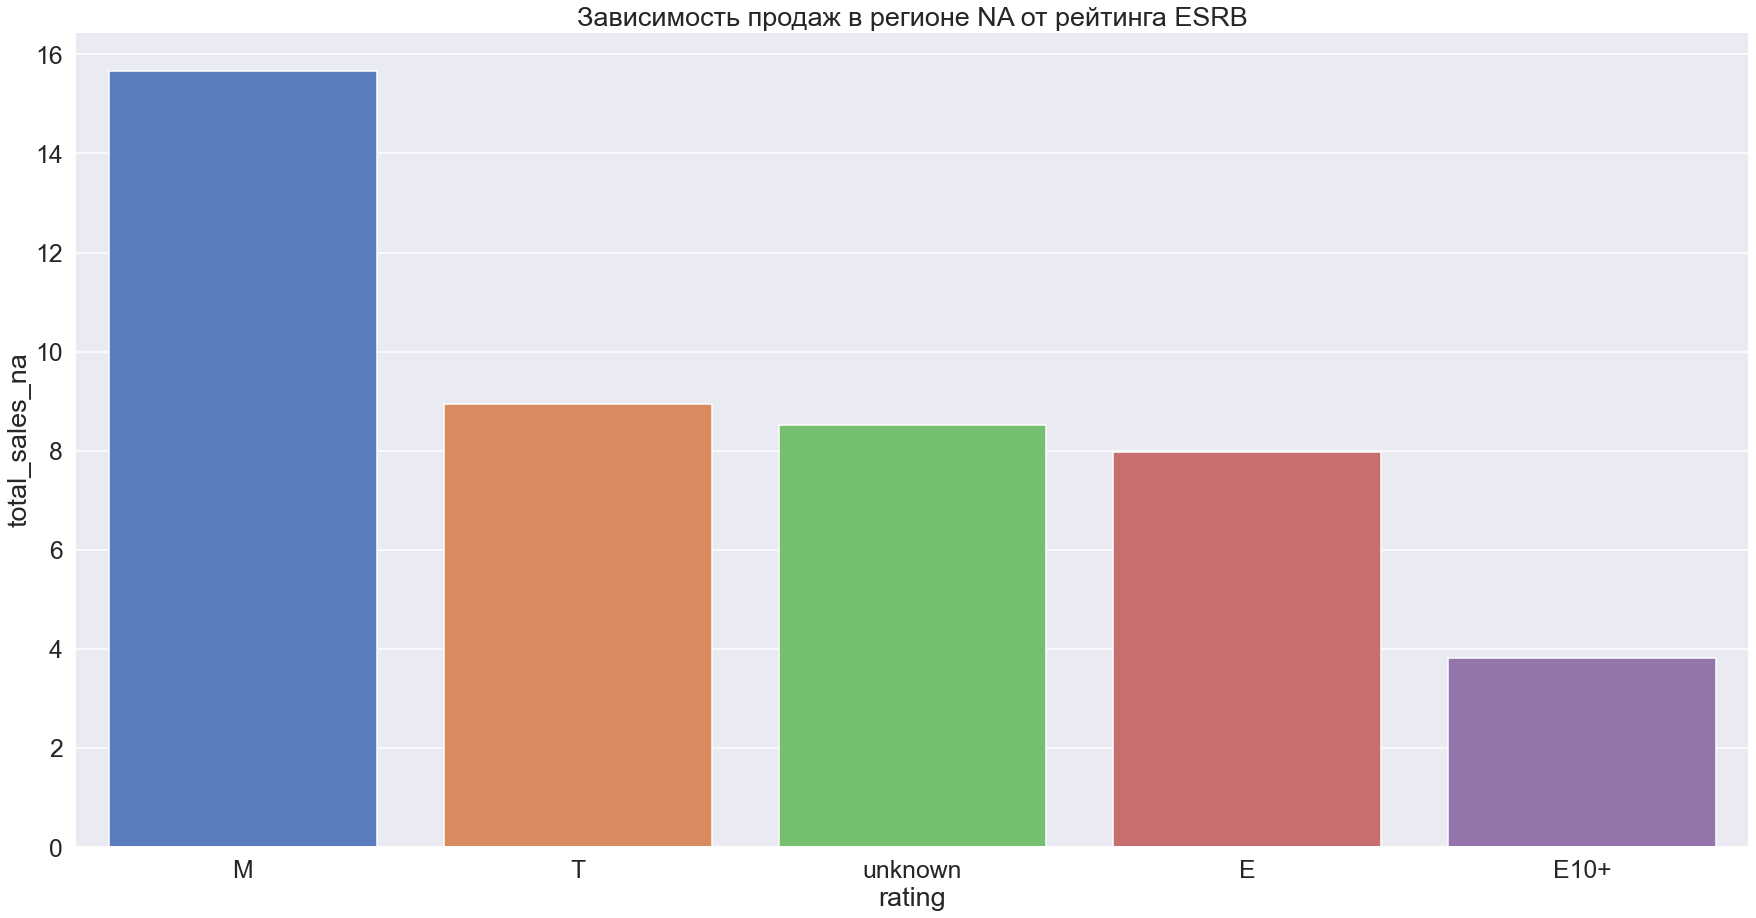

In [42]:
plt.title('Зависимость продаж в регионе NA от рейтинга ESRB')
sns.barplot(x=dependence_sales_rating_na['rating'], y=dependence_sales_rating_na['total_sales_na'])

Продажи в регионе **NA** распределились по рейтингам ESRB следующим образом (в порядке убывания объемов продаж):
- **«M»** («Mature») — *«Для взрослых» 17+*
- **«T»** («Teen») — *«Подросткам» 13+*
- **«E»** («Everyone») — *«Для всех»*
- **«E10+»** («Everyone 10 and older») — *«Для всех от 10 лет и старше»*

### Регион EU
#### Самые популярные платформы (ТОП-5)

In [43]:
sales_platform_eu = df_actual_1_year.groupby('platform')['eu_sales'].sum().reset_index().rename(columns={'eu_sales': 'total_sales_eu'}).sort_values(by='total_sales_eu', ascending=False)
print('ТОП-5 платформ в регионе EU:', *sales_platform_eu['platform'].head(), sep='\n')

ТОП-5 платформ в регионе EU:
PS4
XOne
PC
3DS
WiiU


<AxesSubplot:title={'center':'Распределение продаж в регионе EU по платформам'}, xlabel='platform', ylabel='total_sales_eu'>

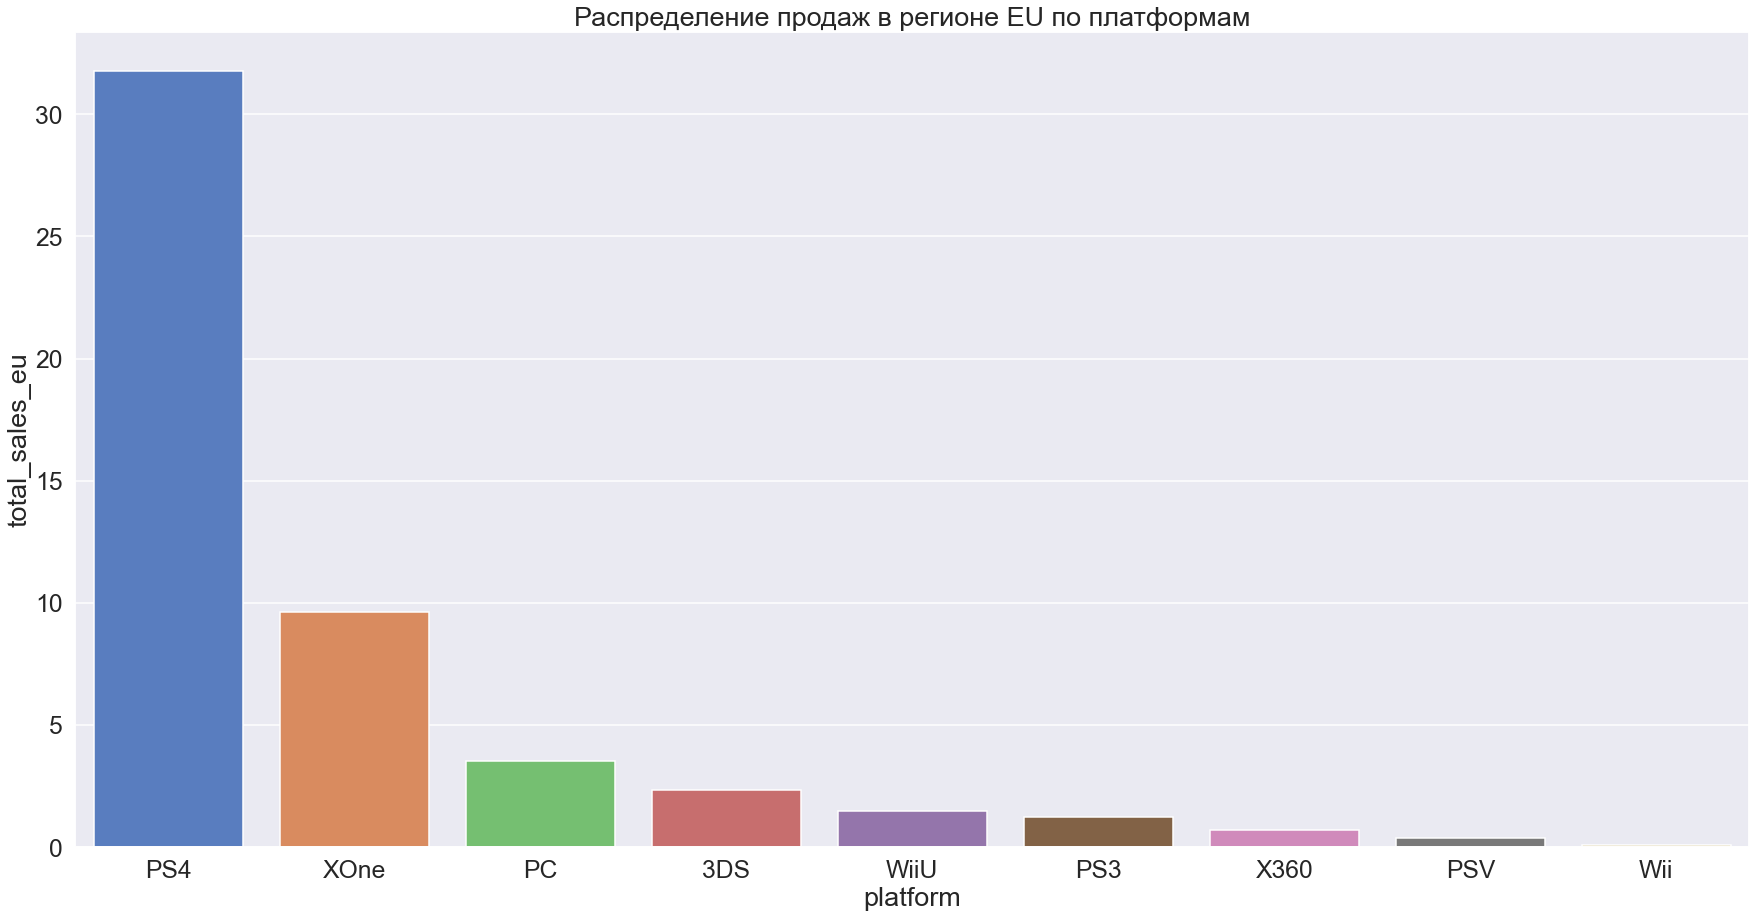

In [44]:
# выполним срез без нулевых значений
sales_platform_eu = sales_platform_eu.query('total_sales_eu > 0')
plt.title('Распределение продаж в регионе EU по платформам')
sns.barplot(x=sales_platform_eu['platform'], y=sales_platform_eu['total_sales_eu'])

#### Самые популярные жанры (ТОП-5)

In [45]:
sales_genre_eu = df_actual_1_year.groupby('genre')['eu_sales'].sum().reset_index().rename(columns={'eu_sales': 'total_sales_eu'}).sort_values(by='total_sales_eu', ascending=False)
print('ТОП-5 жанров в регионе EU:', *sales_genre_eu['genre'].head(), sep='\n')

ТОП-5 жанров в регионе EU:
Shooter
Sports
Action
Role-Playing
Racing


<AxesSubplot:title={'center':'Распределение продаж в регионе EU по жанрам'}, xlabel='genre', ylabel='total_sales_eu'>

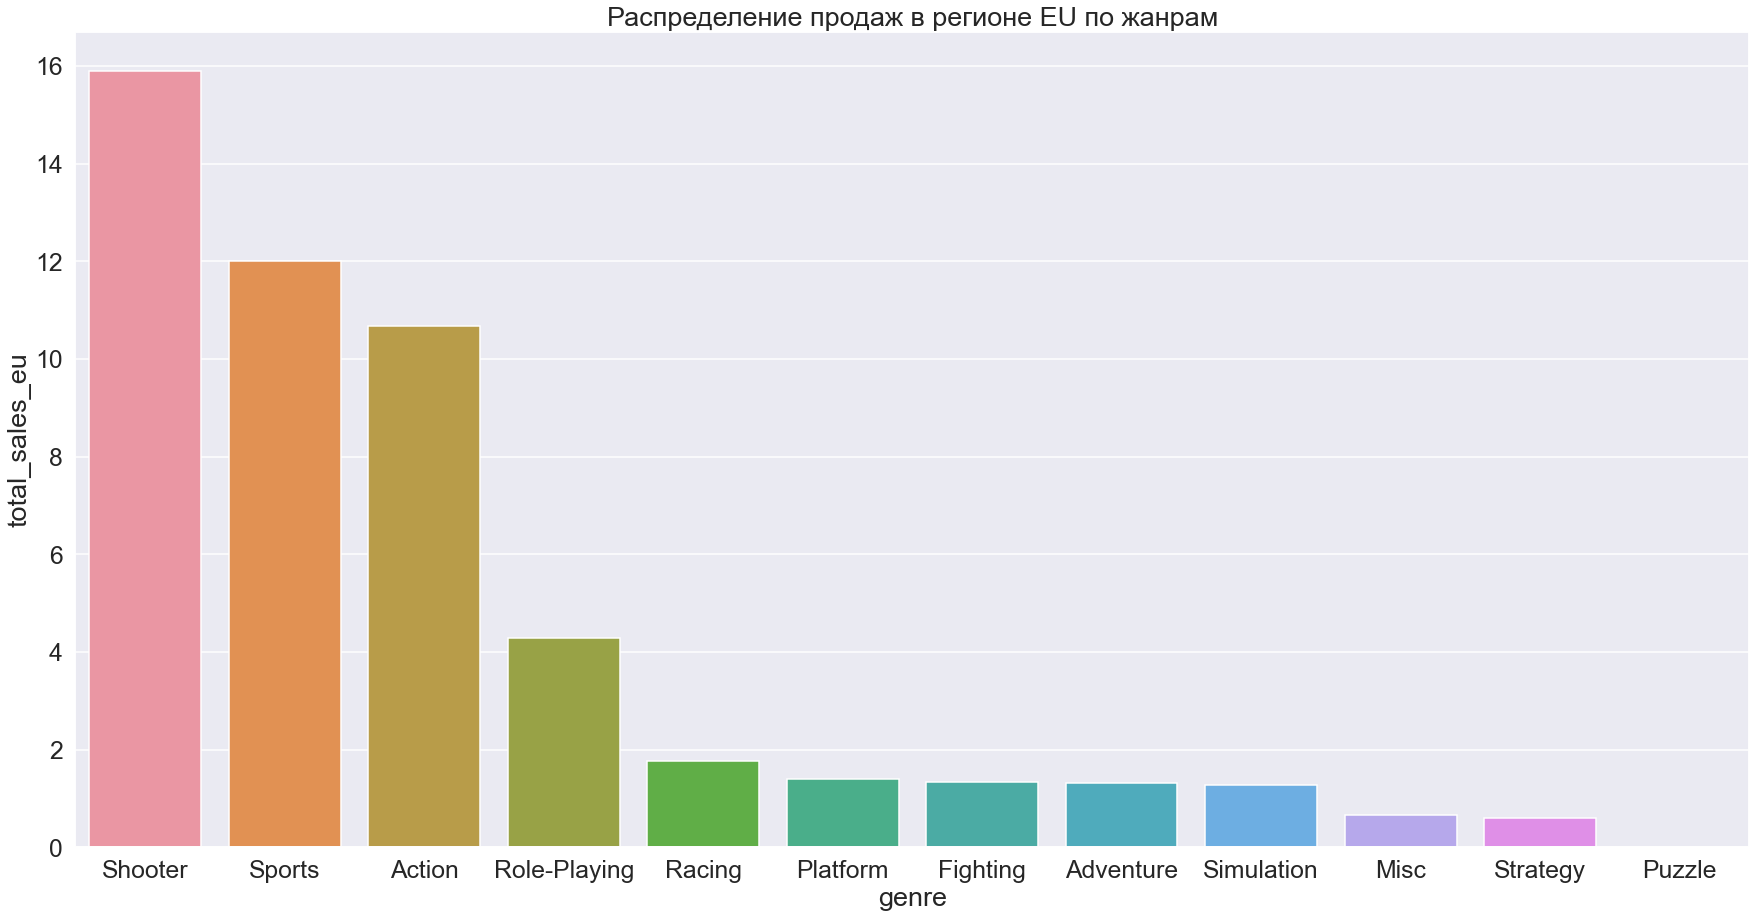

In [46]:
plt.title('Распределение продаж в регионе EU по жанрам')
sns.barplot(x=sales_genre_eu['genre'], y=sales_genre_eu['total_sales_eu'])

#### Влияние рейтинга ESRB на продажи

In [47]:
dependence_sales_rating_eu = df_actual_1_year.query('rating != "RP"').groupby('rating')['eu_sales'].sum().reset_index().rename(columns={'eu_sales': 'total_sales_eu'}).sort_values(by='total_sales_eu', ascending=False)
display(dependence_sales_rating_eu)

,rating,total_sales_eu
2,M,16.54
0,E,13.61
3,T,9.79
4,unknown,7.47
1,E10+,3.81


<AxesSubplot:title={'center':'Зависимость продаж в регионе EU от рейтинга ESRB'}, xlabel='rating', ylabel='total_sales_eu'>

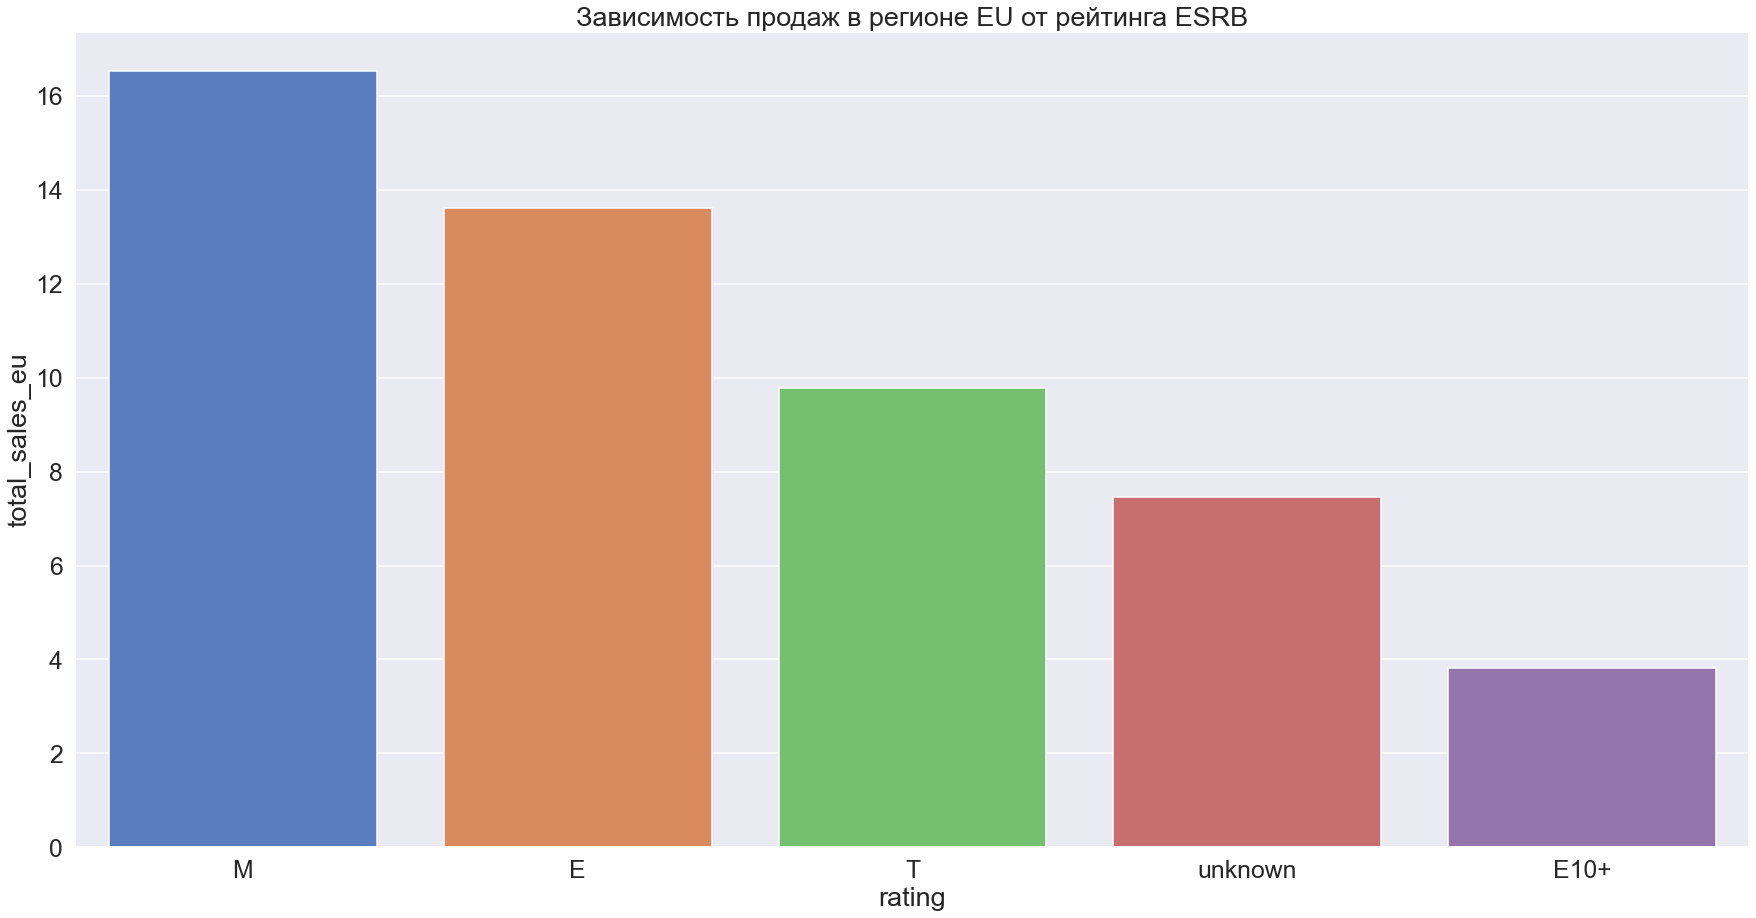

In [48]:
plt.title('Зависимость продаж в регионе EU от рейтинга ESRB')
sns.barplot(x=dependence_sales_rating_eu['rating'], y=dependence_sales_rating_eu['total_sales_eu'])

Продажи в регионе **EU** распределились по рейтингам ESRB следующим образом (в порядке убывания объемов продаж):
- **«M»** («Mature») — *«Для взрослых» 17+*
- **«E»** («Everyone») — *«Для всех»*
- **«T»** («Teen») — *«Подросткам» 13+*
- **«E10+»** («Everyone 10 and older») — *«Для всех от 10 лет и старше»*

### Регион JP
#### Самые популярные платформы (ТОП-5)

In [49]:
sales_platform_jp = df_actual_1_year.groupby('platform')['jp_sales'].sum().reset_index().rename(columns={'jp_sales': 'total_sales_jp'}).sort_values(by='total_sales_jp', ascending=False)
print('ТОП-5 платформ в регионе JP:', *sales_platform_jp['platform'].head(), sep='\n')

ТОП-5 платформ в регионе JP:
3DS
PS4
PSV
PS3
WiiU


<AxesSubplot:title={'center':'Распределение продаж в регионе JP по платформам'}, xlabel='platform', ylabel='total_sales_jp'>

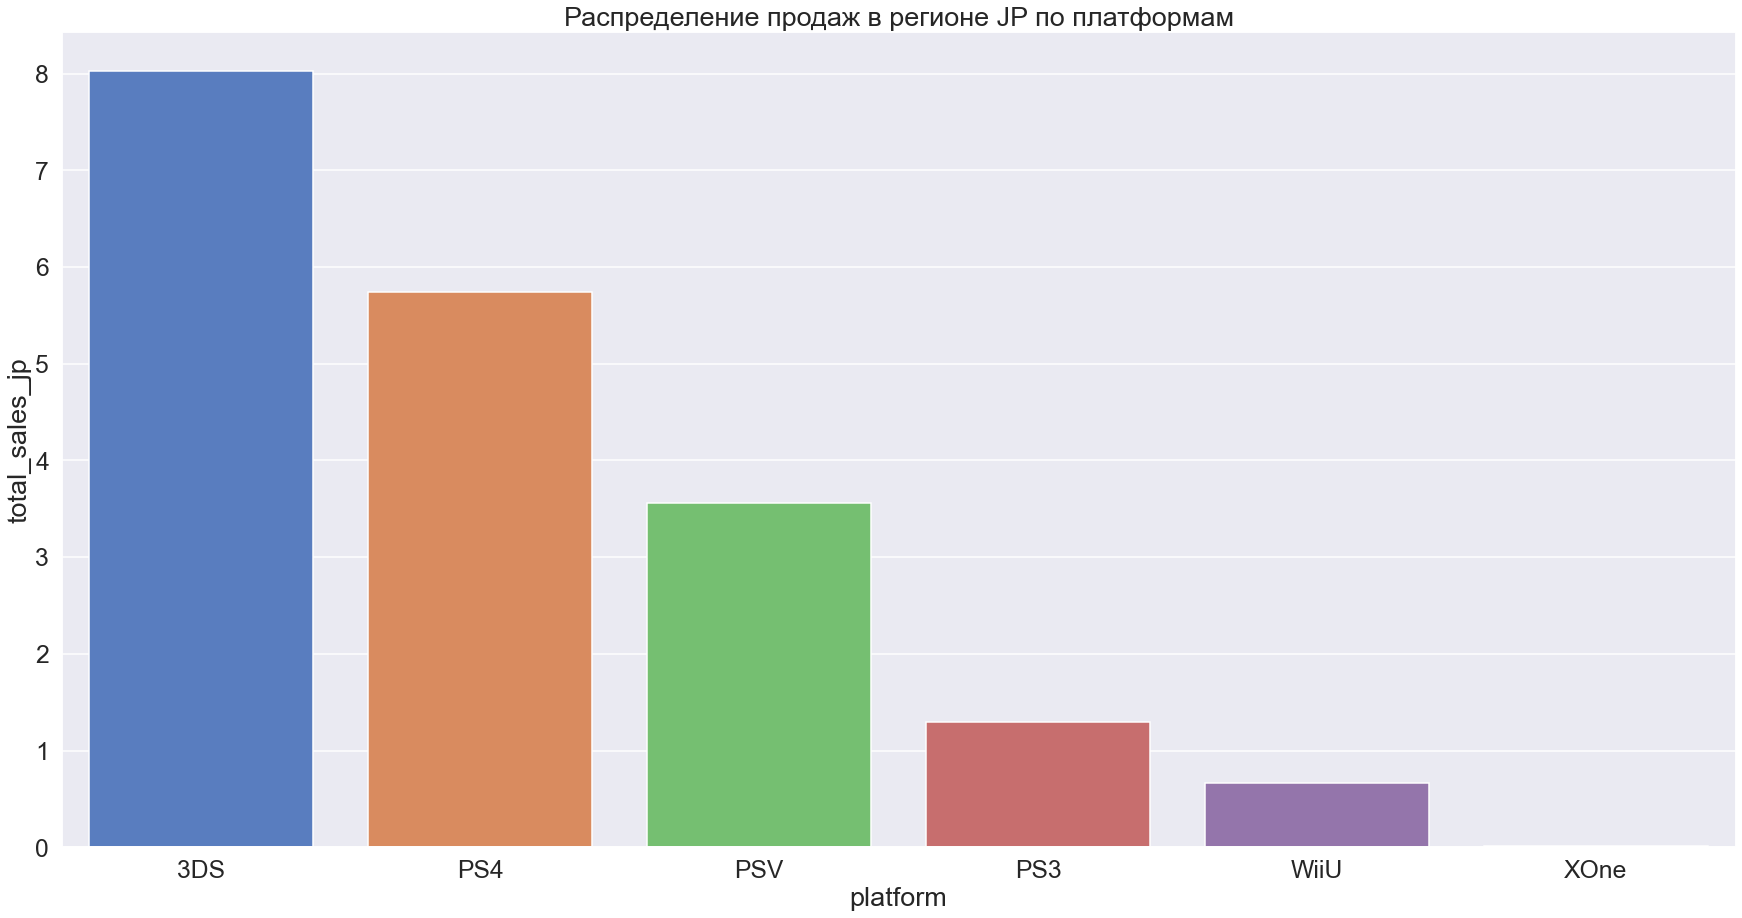

In [50]:
# выполним срез без нулевых значений
sales_platform_jp = sales_platform_jp.query('total_sales_jp > 0')
plt.title('Распределение продаж в регионе JP по платформам')
sns.barplot(x=sales_platform_jp['platform'], y=sales_platform_jp['total_sales_jp'])

#### Самые популярные жанры (ТОП-5)

In [51]:
sales_genre_jp = df_actual_1_year.groupby('genre')['jp_sales'].sum().reset_index().rename(columns={'jp_sales': 'total_sales_jp'}).sort_values(by='total_sales_jp', ascending=False)
print('ТОП-5 жанров в регионе JP:', *sales_genre_jp['genre'].head(), sep='\n')

ТОП-5 жанров в регионе JP:
Action
Role-Playing
Adventure
Shooter
Misc


<AxesSubplot:title={'center':'Распределение продаж в регионе JP по жанрам'}, xlabel='genre', ylabel='total_sales_jp'>

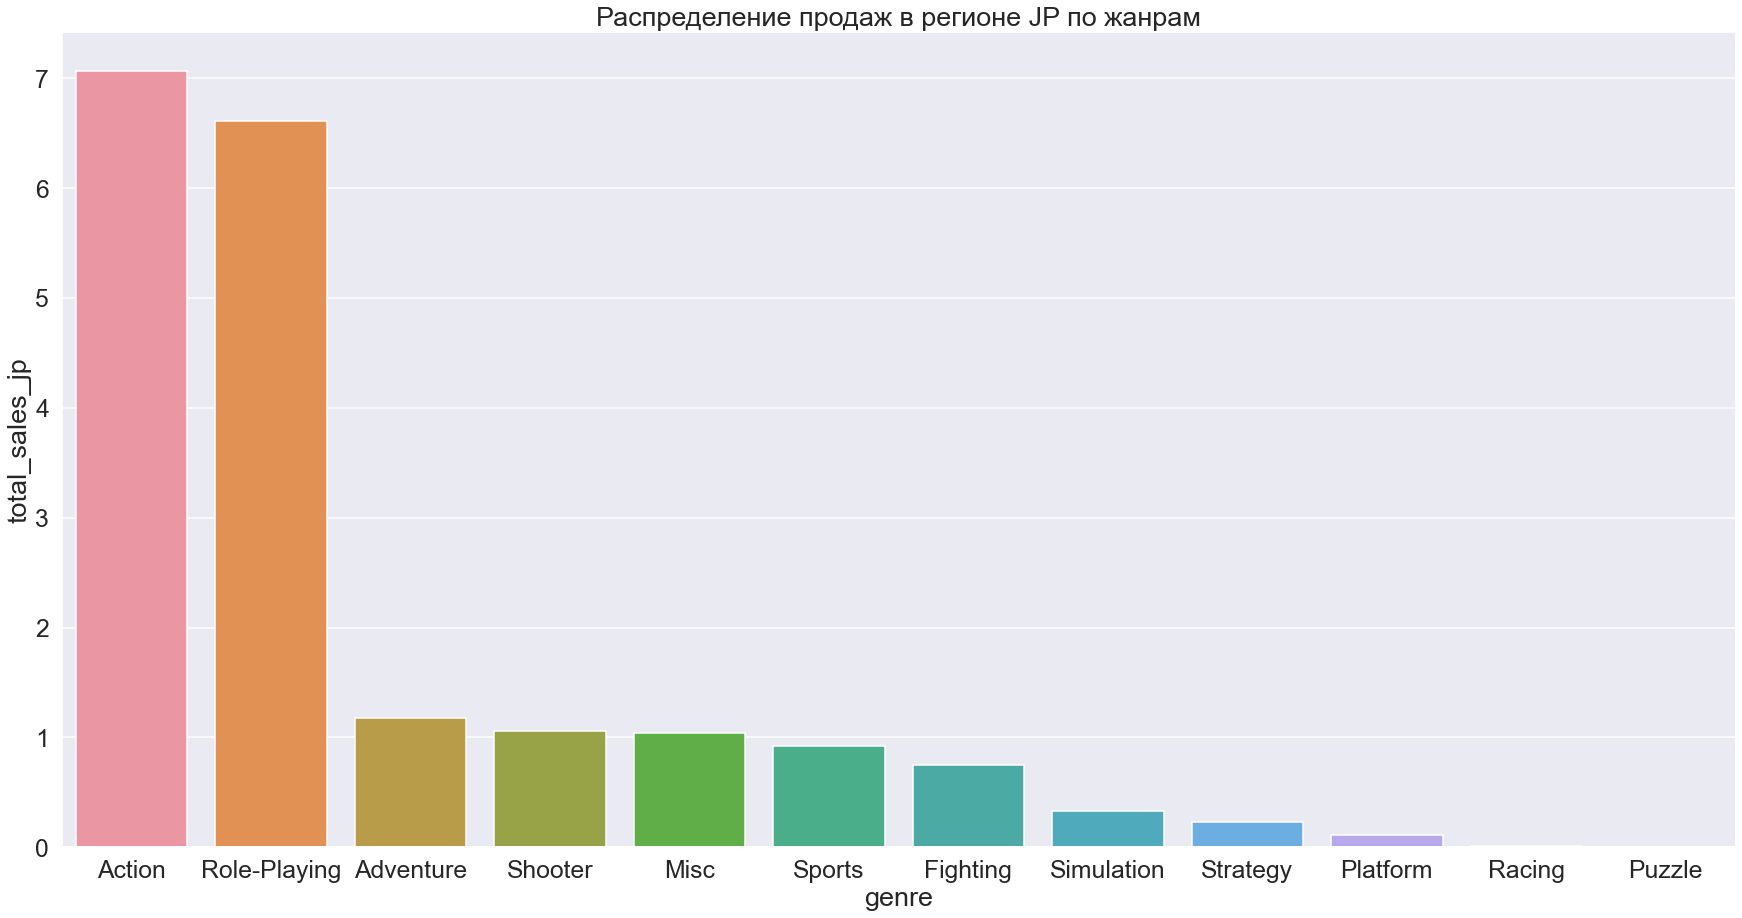

In [52]:
plt.title('Распределение продаж в регионе JP по жанрам')
sns.barplot(x=sales_genre_jp['genre'], y=sales_genre_jp['total_sales_jp'])

#### Влияние рейтинга ESRB на продажи

In [53]:
dependence_sales_rating_jp = df_actual_1_year.query('rating != "RP"').groupby('rating')['jp_sales'].sum().reset_index().rename(columns={'jp_sales': 'total_sales_jp'}).sort_values(by='total_sales_jp', ascending=False)
display(dependence_sales_rating_jp)

,rating,total_sales_jp
4,unknown,14.32
3,T,2.27
2,M,1.20
0,E,1.07
1,E10+,0.45


<AxesSubplot:title={'center':'Зависимость продаж в регионе JP от рейтинга ESRB'}, xlabel='rating', ylabel='total_sales_jp'>

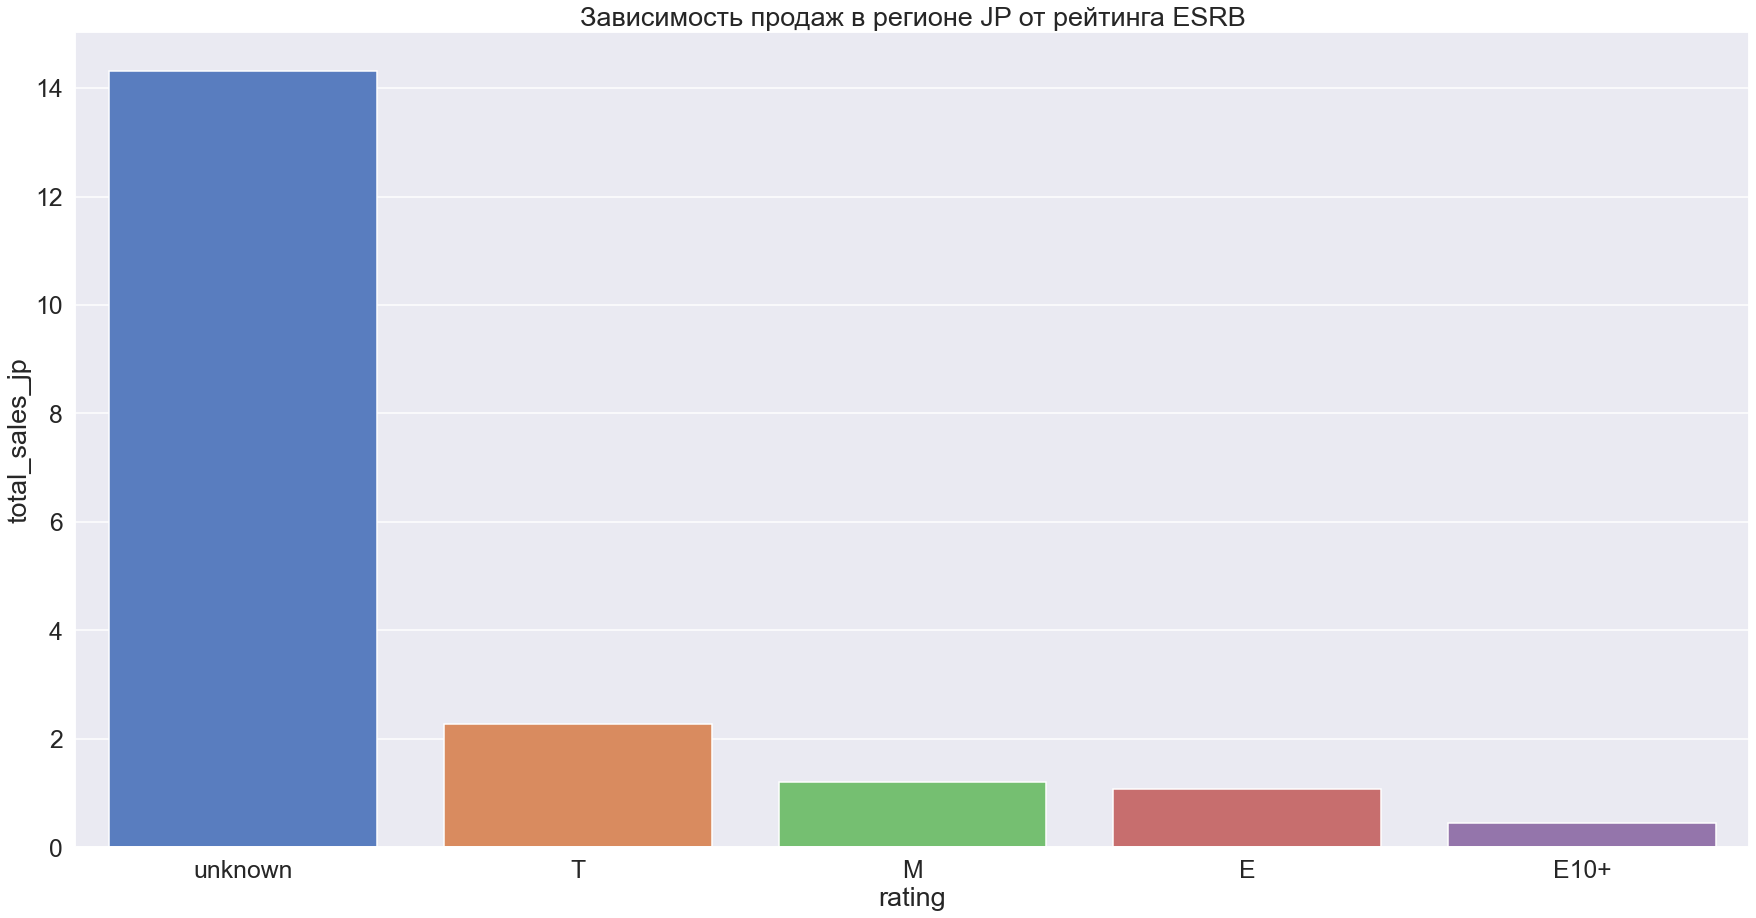

In [54]:
plt.title('Зависимость продаж в регионе JP от рейтинга ESRB')
sns.barplot(x=dependence_sales_rating_jp['rating'], y=dependence_sales_rating_jp['total_sales_jp'])

Продажи в регионе **EU** распределились по рейтингам ESRB следующим образом (в порядке убывания объемов продаж):
- **«T»** («Teen») — *«Подросткам» 13+*
- **«M»** («Mature») — *«Для взрослых» 17+*
- **«E»** («Everyone») — *«Для всех»*
- **«E10+»** («Everyone 10 and older») — *«Для всех от 10 лет и старше»*

## Проверка гипотез


### Гипотеза 1
**Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые**

**Нулевая гипотеза:** Среднии оценки пользователей платформ `Xbox One` и `PC` равны. $$H_0: `MeanScoreXOne` = `MeanScorePC`$$

**Альтернативная гипотеза:** Cреднии оценки пользователей платформ `Xbox One` и `PC` различны. $$H_1: `MeanScoreXOne` <> `MeanScorePC`$$

In [55]:
# избавимся от нулевых значений поля user_score
df_xone = df_xone.query('user_score > 0')
df_pc = df_pc.query('user_score > 0')
# рассчитаем среднии оценки пользователей
print('Средняя оценка пользователей платформы XOne = ', df_xone['user_score'].mean())
print('Средняя оценка пользователей платформы PC = ', df_pc['user_score'].mean())

Средняя оценка пользователей платформы XOne =  6.111111111111111
Средняя оценка пользователей платформы PC =  7.4


In [56]:
# Проверим нулевую гипотезу
# критический уровень статистической значимости
alpha = .05
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    df_xone['user_score'],
    df_pc['user_score']
    )

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.08429172716292664
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2
**Средние пользовательские рейтинги жанров `Action` и `Sports` разные**

**Нулевая гипотеза:** Среднии оценки пользователей по жанрам `Action` и `Sports` равны. $$H_0: `MeanScoreAction` = `MeanScoreSports`$$

**Альтернативная гипотеза:** Cреднии оценки пользователей по жанрам `Action` и `Sports` различны. $$H_1: `MeanScoreAction` <> `MeanScoreSports`$$

In [57]:
# сформируем генеральные совокупности по соответствующим жанрам
df_action = df.query('genre == "Action"')
df_sports = df.query('genre == "Sports"')
# избавимся от нулевых значений поля user_score
df_action = df_action.query('user_score > 0')
df_sports = df_sports.query('user_score > 0')
# рассчитаем среднии оценки пользователей
print('Средняя оценка пользователей в жанре Action = ', df_action['user_score'].mean())
print('Средняя оценка пользователей в жанре Sports = ', df_sports['user_score'].mean())

Средняя оценка пользователей в жанре Action =  7.065609622744669
Средняя оценка пользователей в жанре Sports =  6.982758620689655


In [58]:
# Проверим нулевую гипотезу
# критический уровень статистической значимости
alpha = .05
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    df_action['user_score'],
    df_sports['user_score']
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.15208319550662686
Не получилось отвергнуть нулевую гипотезу


## Общий вывод
### Сводные итоги анализа данных

| Регион | Платформа (топ-5)                    | Жанр (топ-5)                                                  | Возрастной ранг        |
|--------|--------------------------------------|---------------------------------------------------------------|------------------------|
| NA     | PS4<br/>XOne<br/>3DS<br/>WiiU<br/>PC | Shooter<br/>Action<br/>Sports<br/>Role-Playing<br/>Fighting   | M<br/>T<br/>E<br/>E10+ |
| EU     | PS4<br/>XOne<br/>PC<br/>3DS<br/>WiiU | Shooter<br/>Sports<br/>Action<br/>Role-Playing<br/>Racing     | M<br/>E<br/>T<br/>E10+ |
| JP     | 3DS<br/>PS<br/>PSV<br/>PS3<br/>WiiU  | Action<br/>Role_Playing<br/>Adventure<br/>Shooter<br/>Misc    | T<br/>M<br/>E<br/>E10+ |
| Общий  | PS4<br/>XOne<br/>3DS<br/>PC<br/>WiiU | Shooter<br/>Role-Playing<br/>Sports<br/>Platform<br/>Fighting |                        |

### Итоги проверки гипотез
#### Гипотеза 1
**Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые** принята при пороговом значении p-value = 0.05

#### Гипотеза 2
**Средние пользовательские рейтинги жанров `Action` и `Sports` разные** отклонена при пороговом значении p-value = 0.05

### Закономерности, определяющие успешность игры.
- наиболее популярные жанры: Shooter, Role-Playing, Sports.
- региональные акценты:
    - NA на жанры: Shooter, Action, Sports;
    - NA на возрвстные категории: M, T, E;
    - EU на жанры: Shooter, Sports, Action;
    - EU на возрастные категории: M, E, T;
    - JP на жанры: Action, Role-Playing, Adventure;
    - JP на возрастные категории: T, M, E.
- перспективные платформы: PS4, XOne, 3DS, PC.